<a href="https://www.kaggle.com/code/fethullahceviz/project-team3?scriptVersionId=101910671" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automobile/data.csv


In [2]:
df = pd.read_csv('../input/automobile/data.csv')
#df = pd.read_csv('data.csv')
#df = pd.read_csv('/kaggle/input/pre-processing-project-data/data.csv')


In [3]:
#df = pd.read_csv('data.csv')

In [4]:
unique = pd.DataFrame(df.nunique(), columns=['nunique'])
unique


,nunique
Unnamed: 0,62766
location,2344
make,20
model,754
short_description,54368
price,8179
mileage,45618
gearbox,10
registration,302
fuel_type,12


In [5]:
df.head(2)

,Unnamed: 0,location,make,model,short_description,price,mileage,gearbox,registration,fuel_type,...,emissions_sticker,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,0,"LOON OP ZAND, NL","\n,Audi ,\n","\n,A3,\n",2.0 FSI Ambition Pro Line,"[['\n', '€ 4,450.-', '\n']]","['', ['191,066 km']]","\n,Automatic,\n",08/2003,"\n,Gasoline,\n",...,"\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"
1,1,"HEERLEN, NL","\n,Audi ,\n","\n,A3,\n",Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,"[['\n', '€ 12,950.-', '\n']]","['', ['94,758 km']]","\n,Automatic,\n",10/2013,"\n,Gasoline,\n",...,"\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]","\n4, White",None,None,"\nupholstery, Black","\n8, Cloth"


In [6]:
#data tipleri icin
df.dtypes

Unnamed: 0                    int64
location                     object
make                         object
model                        object
short_description            object
price                        object
mileage                      object
gearbox                      object
registration                 object
fuel_type                    object
power                        object
seller                       object
body_type                    object
type                         object
drivetrain                   object
seats                        object
doors                        object
country_version              object
offer_number                 object
warranty                     object
Mileage                      object
first_registration           object
production_date              object
general_inspection           object
last_service                 object
full_service_history         object
non_smoker_vehicle           object
previous_owner              

In [7]:
#ddata hakkinda detayli info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62766 entries, 0 to 62765
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               62766 non-null  int64 
 1   location                 62766 non-null  object
 2   make                     62766 non-null  object
 3   model                    62766 non-null  object
 4   short_description        62617 non-null  object
 5   price                    62766 non-null  object
 6   mileage                  62766 non-null  object
 7   gearbox                  62766 non-null  object
 8   registration             62729 non-null  object
 9   fuel_type                62766 non-null  object
 10  power                    62766 non-null  object
 11  seller                   62766 non-null  object
 12  body_type                62766 non-null  object
 13  type                     62766 non-null  object
 14  drivetrain               62766 non-nul

In [8]:
#null veriler
df.isnull().sum()


Unnamed: 0                     0
location                       0
make                           0
model                          0
short_description            149
price                          0
mileage                        0
gearbox                        0
registration                  37
fuel_type                      0
power                          0
seller                         0
body_type                      0
type                           0
drivetrain                     0
seats                          0
doors                          0
country_version                0
offer_number                   0
warranty                       0
Mileage                        0
first_registration             0
production_date                0
general_inspection             0
last_service                   0
full_service_history           0
non_smoker_vehicle             0
previous_owner                 0
last_timing_belt_change        0
Power                          0
Gearbox   

In [9]:
df.rename(columns = {'Fuel_type':'Fuel_type2'}, inplace = True)

In [10]:
#colum isimleri datframe seklinde 
df_col = pd.DataFrame(df.columns, columns=['columns name'])
df_col


,columns name
0,Unnamed: 0
1,location
2,make
3,model
4,short_description
5,price
6,mileage
7,gearbox
8,registration
9,fuel_type


In [11]:
#colum isimlerinde iki tane olanlarla ilgili arastirma


In [12]:
df[['mileage', 'Mileage']].apply(pd.Series.value_counts)
# Mileage silinecek

,mileage,Mileage
"['', ['1 km']]",1032.0,NaN
"['', ['1,000 km']]",44.0,NaN
"['', ['1,001 km']]",53.0,NaN
"['', ['1,002 km']]",5.0,NaN
"['', ['1,003 km']]",3.0,NaN
...,...,...
"['', ['Automatic']]",117.0,NaN
"['', ['Manual']]",10.0,NaN
"['', ['Semi-automatic']]",6.0,NaN
"[['\n'], ['']]",NaN,62633.0


In [13]:
df[["mileage","Mileage"]][1000:2000]


,mileage,Mileage
1000,"['', ['226,760 km']]","[['\n'], ['']]"
1001,"['', ['248,712 km']]","[['\n'], ['']]"
1002,"['', ['288,660 km']]","[['\n'], ['']]"
1003,"['', ['36,047 km']]","[['\n'], ['']]"
1004,"['', ['42,620 km']]","[['\n'], ['']]"
...,...,...
1995,"['', ['103,634 km']]","[['\n'], ['']]"
1996,"['', ['174,000 km']]","[['\n'], ['']]"
1997,"['', ['155,078 km']]","[['\n'], ['']]"
1998,"['', ['215,515 km']]","[['\n'], ['']]"


In [14]:
df[['gearbox', 'Gearbox']].apply(pd.Series.value_counts)


,gearbox,Gearbox
"\n,02/2020,\n",1.0,NaN
"\n,02/2022,\n",2.0,NaN
"\n,03/2014,\n",1.0,NaN
"\n,07/2017,\n",1.0,NaN
"\n,08/2021,\n",1.0,NaN
"\n,09/2021,\n",1.0,NaN
"\n,Automatic,\n",36633.0,36638.0
"\n,Manual,\n",25430.0,25433.0
"\n,None,\n",NaN,84.0
"\n,Semi-automatic,\n",611.0,611.0


In [15]:
#pd.set_option('display.max_rows', None)
df[["gearbox","Gearbox"]][55:60]


,gearbox,Gearbox
55,"\n,Automatic,\n","\n,Automatic,\n"
56,"\n,Automatic,\n","\n,Automatic,\n"
57,"\n,Automatic,\n","\n,Automatic,\n"
58,"\n,Automatic,\n","\n,Automatic,\n"
59,"\n,Automatic,\n","\n,Automatic,\n"


In [16]:
df[['fuel_type', 'Fuel_type2']].apply(pd.Series.value_counts)


,fuel_type,Fuel_type2
"\n,Automatic,\n",5.0,NaN
"\n,CNG,\n",98.0,41.0
"\n,Diesel (Particle filter),\n",NaN,1209.0
"\n,Diesel,\n",11754.0,10783.0
"\n,Domestic gas L (Particle filter),\n",NaN,1.0
"\n,Domestic gas L,\n",NaN,56.0
"\n,Electric (Particle filter),\n",NaN,1.0
"\n,Electric,\n",4906.0,74.0
"\n,Electric/Diesel,\n",254.0,NaN
"\n,Electric/Gasoline,\n",8179.0,NaN


In [17]:
df['power'] = df['power'].replace(r'["\n", ","]', '', regex=True)
df['power']

0        110kW(150hp)
1         92kW(125hp)
2         92kW(125hp)
3         92kW(125hp)
4        110kW(150hp)
             ...     
62761    125kW(170hp)
62762    103kW(140hp)
62763    132kW(179hp)
62764    103kW(140hp)
62765    104kW(141hp)
Name: power, Length: 62766, dtype: object

In [18]:
df['Power'] = df['Power'].replace(r'["\n", ",","["]', '', regex=True)
df['Power']

0        110kW(150hp)
1         92kW(125hp)
2         92kW(125hp)
3         92kW(125hp)
4        110kW(150hp)
             ...     
62761    125kW(170hp)
62762    103kW(140hp)
62763    132kW(179hp)
62764    103kW(140hp)
62765    104kW(141hp)
Name: Power, Length: 62766, dtype: object

In [19]:
df[['power', 'Power']].apply(pd.Series.value_counts)


,power,Power
100kW(136hp),2190.0,2190.0
101kW(137hp),4.0,4.0
102kW(139hp),24.0,24.0
103kW(140hp),1377.0,1377.0
104kW(141hp),1148.0,1148.0
...,...,...
98kW(133hp),11.0,11.0
99kW(135hp),557.0,557.0
9kW(12hp),1.0,1.0
None,NaN,5330.0


In [20]:
df[["Power","power"]][5500:6000]


,Power,power
5500,270kW(367hp),270kW(367hp)
5501,270kW(367hp),270kW(367hp)
5502,None,[None'']
5503,None,[None'']
5504,270kW(367hp),270kW(367hp)
...,...,...
5995,105kW(143hp),105kW(143hp)
5996,105kW(143hp),105kW(143hp)
5997,90kW(122hp),90kW(122hp)
5998,105kW(143hp),105kW(143hp)


In [21]:
df[['first_registration', 'registration']].apply(pd.Series.value_counts)


,first_registration,registration
01/2000,47.0,47.0
01/2001,62.0,62.0
01/2002,79.0,79.0
01/2003,126.0,126.0
01/2004,157.0,157.0
...,...,...
265 kW (360 hp),NaN,1.0
75 kW (102 hp),NaN,1.0
90 kW (122 hp),NaN,1.0
96 kW (131 hp),NaN,3.0


In [22]:
df[["first_registration","registration"]][5500:6000]


,first_registration,registration
5500,02/2021,02/2021
5501,02/2021,02/2021
5502,02/2021,02/2021
5503,01/2021,01/2021
5504,02/2021,02/2021
...,...,...
5995,04/2011,04/2011
5996,01/2011,01/2011
5997,12/2008,12/2008
5998,01/2010,01/2010


In [23]:
df["Unnamed: 0"].value_counts(dropna=False).to_frame()

,Unnamed: 0
0,1
47429,1
47432,1
47433,1
47434,1
...,...
23646,1
23648,1
23649,1
23650,1


In [24]:
#sutunlarin silinmesi
df.drop(["Mileage","Unnamed: 0","Power","gearbox","registration"], axis=1, inplace=True)
df.columns.T

Index(['location', 'make', 'model', 'short_description', 'price', 'mileage',
       'fuel_type', 'power', 'seller', 'body_type', 'type', 'drivetrain',
       'seats', 'doors', 'country_version', 'offer_number', 'warranty',
       'first_registration', 'production_date', 'general_inspection',
       'last_service', 'full_service_history', 'non_smoker_vehicle',
       'previous_owner', 'last_timing_belt_change', 'Gearbox', 'engine_size',
       'gears', 'cylinders', 'empty_weight', 'Fuel_type2', 'fuel_consumption',
       'co2_emissions', 'emission_class', 'emissions_sticker',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n',
       '\nSafety & Security\n', 'extras', '\ncolour', '\nmanufacturer_color',
       '\npaint', ' upholstery_colour ', ' upholstery '],
      dtype='object')

In [25]:
#colum isimlerin temizlenmesi
df.columns = map(str.strip, df.columns)
df.columns = map(str.lower, df.columns)
df.columns.T

Index(['location', 'make', 'model', 'short_description', 'price', 'mileage',
       'fuel_type', 'power', 'seller', 'body_type', 'type', 'drivetrain',
       'seats', 'doors', 'country_version', 'offer_number', 'warranty',
       'first_registration', 'production_date', 'general_inspection',
       'last_service', 'full_service_history', 'non_smoker_vehicle',
       'previous_owner', 'last_timing_belt_change', 'gearbox', 'engine_size',
       'gears', 'cylinders', 'empty_weight', 'fuel_type2', 'fuel_consumption',
       'co2_emissions', 'emission_class', 'emissions_sticker',
       'comfort & convenience', 'entertainment & media', 'safety & security',
       'extras', 'colour', 'manufacturer_color', 'paint', 'upholstery_colour',
       'upholstery'],
      dtype='object')

In [26]:
#location columbu yazi düyenlemesi
df['location'] = df['location'].str.title()
df['location']

0               Loon Op Zand, Nl
1                    Heerlen, Nl
2              Baarle-Nassau, Nl
3                    Zutphen, Nl
4                Haaksbergen, Nl
                  ...           
62761             Etten-Leur, Nl
62762    Hendrik-Ido-Ambacht, Nl
62763               Lelystad, Nl
62764              Amsterdam, Nl
62765            Soesterberg, Nl
Name: location, Length: 62766, dtype: object

In [27]:
#city ve country ayrildi hepsi tek bir ülke oldugu icin country sildi 
df[['city', 'country']]=df['location'].str.split(',',n=1, expand=True)
df[['city', 'country']]

,city,country
0,Loon Op Zand,Nl
1,Heerlen,Nl
2,Baarle-Nassau,Nl
3,Zutphen,Nl
4,Haaksbergen,Nl
...,...,...
62761,Etten-Leur,Nl
62762,Hendrik-Ido-Ambacht,Nl
62763,Lelystad,Nl
62764,Amsterdam,Nl


In [28]:
df.city.value_counts(dropna=False).to_frame()

,city
Rotterdam,1553
Apeldoorn,1142
Amsterdam,1072
Tilburg,946
Eindhoven,719
...,...
St. Willebrord,1
Venhuizen,1
Ferwerd,1
Oosterhesselen,1


In [29]:
# ülkelerin hepsi nl 
df.country.value_counts(dropna=False).to_frame()

,country
Nl,62762
"Nederland, Nl",1
"Vlaams Brabant, Nl",1
"Netherlands, Nl",1
"Elo, Nl",1


In [30]:
#önceki satirda cikan farkli data grupalrinin arastirilmasi
df[df['country'].str.match('Elo')]

,location,make,model,short_description,price,mileage,fuel_type,power,seller,body_type,...,entertainment & media,safety & security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,city,country
28930,"Alm,Elo, Nl","\n,Volkswagen ,\n","\n,Passat,\n",1.6 TDI Comfortline,"[['\n', '€ 11,500.-', '\n']]","['', ['198,649 km']]","\n,Diesel,\n",88kW(120hp),"['\n', ['Private seller\n']]","\n,Station wagon,\n",...,"[['Apple CarPlay', 'Bluetooth', 'Hands-free eq...","[['ABS', 'Adaptive headlights', 'Alarm system'...","[['Alloy wheels (16"")', 'Ambient lighting', 'A...","\n4, Grey",None,"\npaint, Metallic","\nupholstery, Grey","\n8, Cloth",Alm,"Elo, Nl"


In [31]:
#country ve location columbunun silinmesi
df.drop(["country","location"], axis=1, inplace=True)
df.columns

Index(['make', 'model', 'short_description', 'price', 'mileage', 'fuel_type',
       'power', 'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors',
       'country_version', 'offer_number', 'warranty', 'first_registration',
       'production_date', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'gearbox', 'engine_size', 'gears',
       'cylinders', 'empty_weight', 'fuel_type2', 'fuel_consumption',
       'co2_emissions', 'emission_class', 'emissions_sticker',
       'comfort & convenience', 'entertainment & media', 'safety & security',
       'extras', 'colour', 'manufacturer_color', 'paint', 'upholstery_colour',
       'upholstery', 'city'],
      dtype='object')

In [32]:
#"make", "model", "gearbox", "fuel_type" columlarinin temizlenmesi
df.make.unique().T


array(['\n,Audi ,\n', '\n,BMW ,\n', '\n,Ford ,\n', '\n,Mercedes-Benz ,\n',
       '\n,Opel ,\n', '\n,Volkswagen ,\n', '\n,Renault ,\n',
       '\n,Citroen ,\n', '\n,Chevrolet ,\n', '\n,Dacia ,\n',
       '\n,Fiat ,\n', '\n,Honda ,\n', '\n,Hyundai ,\n', '\n,Kia ,\n',
       '\n,Mazda ,\n', '\n,Peugeot ,\n', '\n,Skoda ,\n', '\n,Toyota ,\n',
       '\n,Tesla ,\n', '\n,Volvo ,\n'], dtype=object)

In [33]:
#df.model.unique()
df.model.value_counts(dropna=False).to_frame()

,model
"\n,A3,\n",1171
"\n,Megane,\n",932
"\n,Golf,\n",921
"\n,A4,\n",843
"\n,Focus,\n",836
...,...
"\n,MX-3,\n",1
"\n,Z3 M,\n",1
"\n,SLK 300,\n",1
"\n,Fox,\n",1


In [34]:
df["model"] = df["model"].replace(r'[^\w]', '', regex=True)
df["model"] = df["model"].replace(r'nNone', np.nan , regex=True)

In [35]:
df.gearbox.unique()

array(['\n,Automatic,\n', '\n,Manual,\n', '\n,Semi-automatic,\n',
       '\n,None,\n'], dtype=object)

In [36]:
colums = ["make", "gearbox", "fuel_type"]

for i in colums:
    df[i] = df[i].replace(r'["\n", ",", " "]', '', regex=True)

In [37]:
df[["make", "model", "gearbox", "fuel_type"]]

,make,model,gearbox,fuel_type
0,Audi,A3,Automatic,Gasoline
1,Audi,A3,Automatic,Gasoline
2,Audi,A1,Automatic,Gasoline
3,Audi,A1,Automatic,Gasoline
4,Audi,A3,Automatic,Gasoline
...,...,...,...,...
62761,Volvo,S60,Manual,LPG
62762,Volvo,S60,Manual,LPG
62763,Volvo,S60,Manual,LPG
62764,Volvo,S40,Manual,LPG


In [38]:
df.make.value_counts(dropna=False).to_frame()

,make
BMW,6942
Volkswagen,6436
Mercedes-Benz,5860
Audi,5675
Volvo,4734
Renault,4255
Ford,4036
Peugeot,3492
Toyota,2783
Skoda,2588


In [39]:
#pd.set_option('display.max_rows', None)
pd.reset_option('^display.', silent=True)

In [40]:
df.model.value_counts(dropna=False).to_frame()

,model
A3,1171
Megane,932
Golf,921
A4,843
Focus,836
...,...
GLA35AMG,1
Taurus,1
Stream,1
KonaElektro,1


In [41]:
df['short_description'] = df["short_description"].str.replace(r'[^\w\s\.]', ' ', regex=True).str.replace("   "," ")


In [42]:
df['short_description']

0                                2.0 FSI Ambition Pro Line
1        Sportback 1.4 TFSI Ambiente ECC PDC  Lichtmeta...
2          1.4 TFSI Sportback Pro Line Aut. S Tronic Navi.
3             S Line Automaat Navigatie Cruise  Climate co
4           Sportback 1.5 TFSI Sport Dealer Onderhouden Pa
                               ...                        
62761                            2.4 Edition APK LMV Airco
62762          2.4 Kinetic LPG G3 NAP LEER NAVI DAK NW APK
62763    2.0T Edition 1e Eigenaar LPG G3 Onderbouw Navi...
62764                                                  2.4
62765        2.4 Airco  Cruise Control  Stuurbekrachtiging
Name: short_description, Length: 62766, dtype: object

In [43]:
# numeric datalar iceren sutunlar asagidaki fonksiyonla temizlenerek bos kisimlara nan degerler yazildi


In [44]:
def numericValue(data):
    data = data.str.replace('\D+', '').replace('', np.nan)
    return data


In [45]:
numVaList = ['price', 'mileage', 'seats', 'doors', "warranty",
             "previous_owner", "engine_size", "gears", "cylinders", "empty_weight"]


In [46]:
df[numVaList]

,price,mileage,seats,doors,warranty,previous_owner,engine_size,gears,cylinders,empty_weight
0,"[['\n', '€ 4,450.-', '\n']]","['', ['191,066 km']]",\n5,\n3,"\n,6 months,\n","[['\n'], ['None']]","\n,1,984 cc,\n","\n,None,\n","\n,4,\n","\n,1,280 kg,\n"
1,"[['\n', '€ 12,950.-', '\n']]","['', ['94,758 km']]",\n5,\n5,"\n,None,\n","[['\n'], ['None']]","\n,1,395 cc,\n","\n,None,\n","\n,4,\n","\n,1,200 kg,\n"
2,"[['\n', '€ 12,450.-', '\n']]","['', ['145,102 km']]",\n5,\n5,"\n,6 months,\n","[['\n'], ['None']]","\n,1,395 cc,\n","\n,None,\n","\n,4,\n","\n,None,\n"
3,"[['\n', '€ 14,945.-', '\n']]","['', ['119,666 km']]",\n4,\n3,"\n,6 months,\n","[['\n'], ['None']]","\n,1,395 cc,\n","\n,7,\n","\n,4,\n","\n,1,105 kg,\n"
4,"[['\n', '€ 24,900.-', '\n']]","['', ['55,815 km']]",\n5,\n5,"\n,6 months,\n","[['\n'], ['None']]","\n,1,495 cc,\n","\n,7,\n","\n,4,\n","\n,1,215 kg,\n"
...,...,...,...,...,...,...,...,...,...,...
62761,"[['\n', '€ 1,799.-', '\n']]","['', ['298,160 km']]",\n5,\n4,"\n,None,\n","[['\n'], ['None']]","\n,2,435 cc,\n","\n,5,\n","\n,5,\n","\n,1,501 kg,\n"
62762,"[['\n', '€ 1,999.-', '\n']]","['', ['442,713 km']]",\n5,\n4,"\n,None,\n","[['\n'], ['None']]","\n,2,435 cc,\n","\n,5,\n","\n,5,\n","\n,1,441 kg,\n"
62763,"[['\n', '€ 3,449.-', '\n']]","['', ['340,257 km']]",\n5,\n4,"\n,None,\n","[['\n'], ['1']]","\n,1,984 cc,\n","\n,5,\n","\n,5,\n","\n,1,495 kg,\n"
62764,"[['\n', '€ 1,650.-', '\n']]","['', ['399,990 km']]",\n5,\n4,"\n,None,\n","[['\n'], ['None']]","\n,None,\n","\n,5,\n","\n,5,\n","\n,None,\n"


In [47]:
for x in numVaList:
    df[x] = numericValue(df[x])
    df[x] = pd.to_numeric(df[x])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [48]:
df[numVaList]

,price,mileage,seats,doors,warranty,previous_owner,engine_size,gears,cylinders,empty_weight
0,4450.0,191066.0,5.0,3.0,6.0,NaN,1984.0,NaN,4.0,1280.0
1,12950.0,94758.0,5.0,5.0,NaN,NaN,1395.0,NaN,4.0,1200.0
2,12450.0,145102.0,5.0,5.0,6.0,NaN,1395.0,NaN,4.0,NaN
3,14945.0,119666.0,4.0,3.0,6.0,NaN,1395.0,7.0,4.0,1105.0
4,24900.0,55815.0,5.0,5.0,6.0,NaN,1495.0,7.0,4.0,1215.0
...,...,...,...,...,...,...,...,...,...,...
62761,1799.0,298160.0,5.0,4.0,NaN,NaN,2435.0,5.0,5.0,1501.0
62762,1999.0,442713.0,5.0,4.0,NaN,NaN,2435.0,5.0,5.0,1441.0
62763,3449.0,340257.0,5.0,4.0,NaN,1.0,1984.0,5.0,5.0,1495.0
62764,1650.0,399990.0,5.0,4.0,NaN,NaN,NaN,5.0,5.0,NaN


In [49]:
df[numVaList].isnull().sum()

price              1378
mileage             133
seats              4925
doors              1161
warranty          41608
previous_owner    58373
engine_size        5143
gears             18184
cylinders          5532
empty_weight       1407
dtype: int64

In [50]:
final_df = df.sort_values(by=['price'], ascending=False)
final_df['price']

1260     123456789.0
19308      1250000.0
20427       999999.0
58699       999999.0
20102       999999.0
            ...     
62498            NaN
62542            NaN
62581            NaN
62660            NaN
62729            NaN
Name: price, Length: 62766, dtype: float64

In [51]:
def dateValue(data):
    data = data.str.replace('\D+', '').replace('', np.nan)
    data = pd.to_datetime(data)
    data =data.dt.strftime('%m/%Y')

    return data


In [52]:
df["first_registration"]=dateValue(df["first_registration"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [53]:
df["first_registration"].isnull().sum()

37

In [54]:
df['first_registration'].value_counts(normalize=True,dropna=False)*100

01/2021    4.593251
01/2022    2.045694
12/2016    1.145525
03/2021    1.145525
12/2020    1.013287
             ...   
04/1997    0.001593
07/1998    0.001593
04/1999    0.001593
05/1997    0.001593
10/1996    0.001593
Name: first_registration, Length: 298, dtype: float64

In [55]:
df.fuel_type.value_counts(dropna=False).to_frame()

,fuel_type
Gasoline,36942
Diesel,11754
Electric/Gasoline,8179
Electric,4906
LPG,547
Electric/Diesel,254
CNG,98
Hydrogen,62
Ethanol,9
Others,7


In [56]:
colums = ["fuel_type2"]

for i in colums:
    df[i] = df[i].replace(r'["\n", ",", " "]', '', regex=True)

In [57]:
df[['fuel_type',"fuel_type2"]].apply(pd.Series.value_counts)


,fuel_type,fuel_type2
Automatic,5.0,NaN
CNG,98.0,41.0
Diesel,11754.0,10783.0
Diesel(Particlefilter),NaN,1209.0
DomesticgasL,NaN,56.0
DomesticgasL(Particlefilter),NaN,1.0
Electric,4906.0,74.0
Electric(Particlefilter),NaN,1.0
Electric/Diesel,254.0,NaN
Electric/Gasoline,8179.0,NaN


In [58]:
flist= df[df['fuel_type'].str.contains("Automatic|Manual|Others", na=False)].index
flist

Int64Index([10945, 12612, 15284, 21624, 24824, 29882, 31244, 37355, 37493,
            38045, 40852, 40853, 46581, 55759, 55764],
           dtype='int64')

In [59]:
fvalue= list(df['fuel_type2'][flist])
fvalue

['Others',
 'Others',
 'Diesel',
 'None',
 'Others',
 'Diesel',
 'Regular/Benzine91',
 'Diesel',
 'Diesel',
 'Gasoline',
 'Regular/Benzine91',
 'Regular/Benzine91',
 'Regular/Benzine91',
 'Super95',
 'Super95']

In [60]:
df['fuel_type'].loc[10945, 12612, 15284, 21624, 24824, 29882, 31244, 37355, 37493,38045, 40852, 40853, 46581, 55759, 55764] = ['Others','Others','Diesel','None',
 'Others','Diesel', 'Gasoline', 'Diesel', 'Diesel', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline']


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [61]:
df[['fuel_type', 'fuel_type2']]

,fuel_type,fuel_type2
0,Gasoline,Super95
1,Gasoline,Gasoline
2,Gasoline,Gasoline
3,Gasoline,Gasoline
4,Gasoline,Super95
...,...,...
62761,LPG,LPG
62762,LPG,LPG
62763,LPG,LPG
62764,LPG,Liquidpetroleumgas(LPG)


In [62]:
df["fuel_type"] = df["fuel_type"].replace(['Electric/Gasoline',"Electric/Diesel"], 'Hybrid', regex=True)

In [63]:
df[['fuel_type']].apply(pd.Series.value_counts)


,fuel_type
Gasoline,36949
Diesel,11758
Hybrid,8433
Electric,4906
LPG,547
CNG,98
Hydrogen,62
Ethanol,9
Others,3
None,1


In [64]:
# power sütununda kw ve hp cinsinde degerler birlikte oldugu icin önce degerleri ayirdik 
df[['power_kw', 'power_hp']]=df['power'].str.split('kW', n=2, expand=True)
#df['power_hp']= df['power_hp'].str.replace(r'\D', '').replace("", np.nan)


In [65]:
# power_hp yukaridaki fonksiyon ile temizledik
df['power_hp']= numericValue(df['power_hp'])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [66]:
df['power_hp'] = pd.to_numeric(df["power_hp"])
 

In [67]:
df['power_hp'].value_counts(normalize=True,dropna=False)*100


NaN      8.503011
150.0    5.858267
120.0    4.011726
136.0    3.489150
122.0    3.463659
           ...   
223.0    0.001593
322.0    0.001593
50.0     0.001593
18.0     0.001593
14.0     0.001593
Name: power_hp, Length: 357, dtype: float64

In [68]:
#power kw - power hp ayni degerleri verdigi icin power ve power kw silindi
df.drop(["power","power_kw"], axis=1, inplace=True)

--- seller ---

In [69]:
df['seller'].unique()

array(["['\\n', ['Dealer\\n']]", "['\\n', ['Private seller\\n']]",
       "['\\n', ['Diesel\\n']]", "['\\n', ['Electric\\n']]",
       "['\\n', ['Gasoline\\n']]"], dtype=object)

In [70]:
df['seller'] = df['seller'].str.replace(r'[^\w\s]|n', '', regex=True)
df['seller']


0                 Dealer
1                 Dealer
2                 Dealer
3                 Dealer
4                 Dealer
              ...       
62761             Dealer
62762             Dealer
62763             Dealer
62764     Private seller
62765             Dealer
Name: seller, Length: 62766, dtype: object

In [71]:
df["seller"].value_counts(dropna=False).to_frame()

,seller
Dealer,57428
Private seller,5330
Diesel,4
Gasolie,3
Electric,1


In [72]:
df["seller"].replace(['Diesel','Gasolie',"Electric"], np.nan, regex=True, inplace=True)

In [73]:
df["seller"].value_counts(dropna=False).to_frame()

,seller
Dealer,57428
Private seller,5330
NaN,8


In [74]:
colums=["body_type","type","drivetrain"]

for i in colums:
    df[i]=df[i].str.replace(r'[^\w\s\/\-]|\n|None', '',regex=True).str.replace("/", ' ')        
    df[i].replace([""], np.nan, regex=True, inplace=True)

---body_type---

In [75]:
df[["body_type","type","drivetrain"]]


,body_type,type,drivetrain
0,Compact,Used,Front
1,Compact,Used,Front
2,Compact,Used,NaN
3,Compact,Used,Front
4,Compact,Used,Front
...,...,...,...
62761,Sedan,Used,Front
62762,Sedan,Used,Front
62763,Sedan,Used,Front
62764,Sedan,Used,Front


In [76]:
df.body_type.value_counts(dropna=False).to_frame()

,body_type
Off-Road Pick-up,17348
Compact,13185
Station wagon,11318
Van,6243
Sedan,5341
Convertible,3645
Transporter,2249
Coupe,1923
NaN,948
Other,562


--- type ---

In [77]:
df.type.value_counts(dropna=False).to_frame()

,type
Used,55523
New,3413
Demonstration,1889
Pre-registered,993
NaN,948


In [78]:
df.drivetrain.value_counts(dropna=False).to_frame()

,drivetrain
Front,33522
NaN,14594
4WD,7363
Rear,7287


In [79]:
cols = list(df.columns.values)
print(cols)

['make', 'model', 'short_description', 'price', 'mileage', 'fuel_type', 'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version', 'offer_number', 'warranty', 'first_registration', 'production_date', 'general_inspection', 'last_service', 'full_service_history', 'non_smoker_vehicle', 'previous_owner', 'last_timing_belt_change', 'gearbox', 'engine_size', 'gears', 'cylinders', 'empty_weight', 'fuel_type2', 'fuel_consumption', 'co2_emissions', 'emission_class', 'emissions_sticker', 'comfort & convenience', 'entertainment & media', 'safety & security', 'extras', 'colour', 'manufacturer_color', 'paint', 'upholstery_colour', 'upholstery', 'city', 'power_hp']


In [80]:
dfethullah = df[['make', 'model', 'short_description', 'price', 'mileage', 'gearbox', 'fuel_type', 'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors','city', 'power_hp']]

In [81]:
dfethullah.iloc[1000:2000, 0:18]


,make,model,short_description,price,mileage,gearbox,fuel_type,seller,body_type,type,drivetrain,seats,doors,city,power_hp
1000,Audi,TT,Roadster 1.8 5V Turbo Stoelverwarming,4499.0,226760.0,Manual,Gasoline,Dealer,Convertible,Used,Front,2.0,2.0,Doornenburg,179.0
1001,Audi,A4,Cabriolet 2.4 V6 Exclusive Leer Handgeschakeld,4450.0,248712.0,Manual,Gasoline,Dealer,Convertible,Used,Front,4.0,2.0,Putten,170.0
1002,Audi,A4,Cabriolet Exclusive 2.4 V6 170 pk leder elekt.,3850.0,288660.0,Manual,Gasoline,Dealer,Convertible,Used,NaN,4.0,2.0,Lemelerveld,170.0
1003,Audi,S3,Cabriolet 2.0 TFSI 310pk S tronic quattro Matrix,48800.0,36047.0,Automatic,Gasoline,Dealer,Convertible,Used,4WD,5.0,2.0,Geldermalsen,310.0
1004,Audi,A5,Cabrio 2.0 TFSI S Tronic Quattro S Line 252pk Le,48950.0,42620.0,Automatic,Gasoline,Dealer,Convertible,Used,NaN,NaN,2.0,Staphorst,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Audi,A4,Avant 2.0 TFSI quattro S Line 200PK Youngtimer...,11695.0,103634.0,Automatic,Gasoline,Dealer,Station wagon,Used,4WD,5.0,5.0,Veldhoven,200.0
1996,Audi,A6,2.0 TFSI Pro Line S,11500.0,174000.0,Automatic,Gasoline,Private seller,Station wagon,Used,Front,4.0,4.0,Amstelveen,170.0
1997,Audi,A4allroad,quattro 2.0 TFSI PANO LEDER NAVI XENON,11777.0,155078.0,Automatic,Gasoline,Dealer,Station wagon,Used,4WD,5.0,5.0,Lelystad,211.0
1998,Audi,A4,Avant 2.0 TFSI S line sportpakket,11496.0,215515.0,Automatic,Gasoline,Dealer,Station wagon,Used,Front,5.0,5.0,Rotterdam,179.0


---

# - - - MURAT - - -

In [82]:
#17-unique values of "country version"
df["country_version"].unique()

array(['Country version,None', 'Country version,Netherlands',
       'Country version,Austria', 'Country version,Germany',
       'Country version,Denmark', 'Country version,Luxembourg',
       'Country version,Spain', 'Country version,Belgium',
       'Country version,Switzerland', 'Country version,United States',
       'Country version,Sweden', 'Country version,Slovenia',
       'Country version,Poland', 'Country version,Japan',
       'Country version,Italy', 'Country version,France',
       'Country version,Canada', 'Country version,Latvia',
       'Country version,United Kingdom', 'Country version,Romania',
       'Country version,Slovakia', 'Country version,Estonia',
       'Country version,Namibia', 'Country version,Lithuania',
       'Country version,Czechia', 'Country version,Hungary',
       'Country version,United Arab Emirates'], dtype=object)

In [83]:
#17-Remove "Country version,"
df.country_version=df.country_version.str.replace("Country version,","")
df.country_version.unique()

array(['None', 'Netherlands', 'Austria', 'Germany', 'Denmark',
       'Luxembourg', 'Spain', 'Belgium', 'Switzerland', 'United States',
       'Sweden', 'Slovenia', 'Poland', 'Japan', 'Italy', 'France',
       'Canada', 'Latvia', 'United Kingdom', 'Romania', 'Slovakia',
       'Estonia', 'Namibia', 'Lithuania', 'Czechia', 'Hungary',
       'United Arab Emirates'], dtype=object)

In [84]:
df.country_version.replace('None',np.nan,inplace=True)

In [85]:
#17-Remove "Country version,"
df.country_version=df.country_version.str.replace("Country version,","")
df.country_version.unique()

array([nan, 'Netherlands', 'Austria', 'Germany', 'Denmark', 'Luxembourg',
       'Spain', 'Belgium', 'Switzerland', 'United States', 'Sweden',
       'Slovenia', 'Poland', 'Japan', 'Italy', 'France', 'Canada',
       'Latvia', 'United Kingdom', 'Romania', 'Slovakia', 'Estonia',
       'Namibia', 'Lithuania', 'Czechia', 'Hungary',
       'United Arab Emirates'], dtype=object)

In [86]:
df.country_version.replace('None',np.nan,inplace=True)

In [87]:
df.country_version.isnull().sum()

54824

In [88]:
df.country_version.replace('None',np.nan,inplace=True)

In [89]:
df.country_version.notnull().sum()

7942

In [90]:
df.country_version.value_counts()

Netherlands             6835
Germany                  772
Belgium                  106
Sweden                    50
Denmark                   36
France                    21
Czechia                   19
Spain                     16
Switzerland               14
Italy                     13
United States             13
Poland                    12
Austria                    9
Luxembourg                 6
Slovenia                   5
Japan                      2
Canada                     2
United Kingdom             2
Hungary                    2
Latvia                     1
Romania                    1
Slovakia                   1
Estonia                    1
Namibia                    1
Lithuania                  1
United Arab Emirates       1
Name: country_version, dtype: int64

In [91]:
# df.replace(r'^\s*$', np.nan, regex=True)

In [92]:
df.country_version.isnull().sum()

54824

In [93]:
#dummy=pd.get_dummies(df['country_version'], prefix='country_version')

In [94]:
#df=pd.concat([df,dummy],axis=1)
#df

In [95]:
df.isnull().sum()

make                           0
model                          8
short_description            149
price                       1378
mileage                      133
fuel_type                      0
seller                         8
body_type                    948
type                         948
drivetrain                 14594
seats                       4925
doors                       1161
country_version            54824
offer_number                   0
warranty                   41608
first_registration            37
production_date                0
general_inspection             0
last_service                   0
full_service_history           0
non_smoker_vehicle             0
previous_owner             58373
last_timing_belt_change        0
gearbox                        0
engine_size                 5143
gears                      18184
cylinders                   5532
empty_weight                1407
fuel_type2                     0
fuel_consumption               0
co2_emissi

In [96]:
#pd.reset_option('display.max_rows', None)
df.drop('country_version',axis=1,inplace=True)

In [97]:
#18-Remove white blank
df.offer_number=df.offer_number.str.strip()
df["offer_number"]

0        SJ-112-R
1          809725
2         2601307
3        L-847-SK
4        PZ-744-H
           ...   
62761    52-XX-LB
62762    06-RB-XS
62763    75-PK-RN
62764        None
62765    26-HN-LS
Name: offer_number, Length: 62766, dtype: object

In [98]:
#pd.set_option('display.max_rows', None)

In [99]:
#18-offer_number
df.offer_number.unique()

array(['SJ-112-R', '809725', '2601307', ..., '06-RB-XS', '75-PK-RN',
       '26-HN-LS'], dtype=object)

In [100]:
df.offer_number.value_counts(dropna=False).to_frame()

,offer_number
None,9928
NIEUW,53
XX,28
.,17
1776,13
...,...
#38416,1
#38787,1
#38418,1
#37783,1


In [101]:
#21-production_date
df.production_date.unique()

array(['None', '2015', '2011', '2012', '2013', '2016', '2014', '2010',
       '2009', '2021', '2004', '2017', '2008', '2006', '2007', '2020',
       '2018', '2003', '2000', '2019', '2005', '2001', '2002', '2022',
       '1998', '1997'], dtype=object)

In [102]:
df.production_date.value_counts(dropna=False).to_frame()

,production_date
None,56210
2021,993
2017,627
2016,541
2020,505
2018,482
2019,387
2015,318
2014,312
2011,292


In [103]:
df.drop("production_date",axis=1,inplace=True)

In [104]:
df.general_inspection=dateValue(df.general_inspection)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [105]:
df['general_inspection'].value_counts(normalize=True,dropna=False)*100

NaN        48.704713
06/2022     3.455693
03/2022     3.226269
07/2022     3.084472
05/2022     3.074913
             ...    
11/2014     0.001593
09/2017     0.001593
08/2018     0.001593
06/2019     0.001593
12/2019     0.001593
Name: general_inspection, Length: 93, dtype: float64

In [106]:
#df["general_inspection"] = df["general_inspection"].dt.year

In [107]:
#23-last_service
df.last_service.unique()

array(['None'], dtype=object)

In [108]:
#23-last_service

df.last_service.value_counts(dropna=False).to_frame()

,last_service
None,62766


In [109]:
#23-Delete last_service column
df.drop("last_service",axis=1,inplace=True)

In [110]:
#24-full_service_history column
df.full_service_history.unique()

array(['\n,Yes,\n', '\n,None,\n'], dtype=object)

In [111]:
#24-Remove blank full_service_history column
df.full_service_history=df.full_service_history.str.strip()
df.full_service_history=df.full_service_history.str.replace(",","")
df.full_service_history

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
62761     Yes
62762     Yes
62763     Yes
62764    None
62765    None
Name: full_service_history, Length: 62766, dtype: object

In [112]:
df.full_service_history.value_counts(dropna=False).to_frame()

,full_service_history
Yes,43101
None,19665


In [113]:
df.full_service_history.replace({'Yes':1,'None':0},inplace=True)
#df.full_service_history.replace('None',np.nan,inplace=True)
#df.full_service_history.fillna('No')

In [114]:
#24
df.full_service_history.value_counts(dropna=False).to_frame()

,full_service_history
1,43101
0,19665


In [115]:
#25-non_smoker_vehicle column
df.non_smoker_vehicle.unique()

array(['\n,None,\n', '\n,Yes,\n'], dtype=object)

In [116]:
#25-Remove blank non_smoker_vehicle column
df.non_smoker_vehicle=df.non_smoker_vehicle.str.strip()
df.non_smoker_vehicle=df.non_smoker_vehicle.str.replace(",","")
df.non_smoker_vehicle

0        None
1        None
2         Yes
3        None
4        None
         ... 
62761    None
62762    None
62763    None
62764    None
62765    None
Name: non_smoker_vehicle, Length: 62766, dtype: object

In [117]:
#25-non_smoker_vehicle
df.non_smoker_vehicle.value_counts(dropna=False).to_frame()

,non_smoker_vehicle
None,57769
Yes,4997


In [118]:
df.non_smoker_vehicle.replace({'Yes':1,'None':0},inplace=True)
#df.non_smoker_vehicle.replace('None',np.nan,inplace=True)
#df.non_smoker_vehicle.fillna('No')

In [119]:
df.non_smoker_vehicle.value_counts(dropna=False).to_frame()

,non_smoker_vehicle
0,57769
1,4997


In [120]:
#df=pd.concat([df,dummy],axis=1)
#df

In [121]:
# last_timing_belt_change verinin 99 i bos silindi
df['last_timing_belt_change'].value_counts(normalize=True,dropna=False)*100

[['\n'], ['None']]       98.660103
[['\n'], ['06/2021']]     0.065322
[['\n'], ['05/2021']]     0.049390
[['\n'], ['10/2021']]     0.049390
[['\n'], ['09/2021']]     0.044610
                           ...    
[['\n'], ['02/2015']]     0.001593
[['\n'], ['04/2016']]     0.001593
[['\n'], ['06/2014']]     0.001593
[['\n'], ['04/2015']]     0.001593
[['\n'], ['11/2015']]     0.001593
Name: last_timing_belt_change, Length: 82, dtype: float64

In [122]:
#sutunlarin silinmesi
df.drop(["last_timing_belt_change"], axis=1, inplace=True)

In [123]:
#28-Gearbox column
#df.Gearbox.unique()

In [124]:
#28-Remove white blank and comma Gearbox column
#df.Gearbox=df.Gearbox.str.strip()
#df.Gearbox=df.Gearbox.str.replace(",","")
#df.Gearbox

In [125]:
#28- Gearbox
#df.Gearbox.value_counts(dropna=False).to_frame()

In [126]:
#28-Gearbox column
#df.Gearbox.unique()

In [127]:
df1=df.engine_size.dropna()
df2=pd.to_numeric(df1)
df2


0        1984.0
1        1395.0
2        1395.0
3        1395.0
4        1495.0
          ...  
62760    1999.0
62761    2435.0
62762    2435.0
62763    1984.0
62765    2435.0
Name: engine_size, Length: 57623, dtype: float64

In [128]:
bins = [0,1200, 1600, 2000, 4000,8000]

In [129]:
group_names = ['Very_Small','Small', 'Medium', 'Large', 'Very_Large']

In [130]:

cats = pd.cut(df2, bins,labels=group_names)
#cats=pd.DataFrame(cats)
cats

0        Medium
1         Small
2         Small
3         Small
4         Small
          ...  
62760    Medium
62761     Large
62762     Large
62763    Medium
62765     Large
Name: engine_size, Length: 57623, dtype: category
Categories (5, object): ['Very_Small' < 'Small' < 'Medium' < 'Large' < 'Very_Large']

In [131]:
dummy=pd.get_dummies(cats, prefix='engine_size')

In [132]:
df=pd.concat([df,dummy],axis=1)
df

,make,model,short_description,price,mileage,fuel_type,seller,body_type,type,drivetrain,...,paint,upholstery_colour,upholstery,city,power_hp,engine_size_Very_Small,engine_size_Small,engine_size_Medium,engine_size_Large,engine_size_Very_Large
0,Audi,A3,2.0 FSI Ambition Pro Line,4450.0,191066.0,Gasoline,Dealer,Compact,Used,Front,...,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth",Loon Op Zand,150.0,0.0,0.0,1.0,0.0,0.0
1,Audi,A3,Sportback 1.4 TFSI Ambiente ECC PDC Lichtmeta...,12950.0,94758.0,Gasoline,Dealer,Compact,Used,Front,...,None,"\nupholstery, Black","\n8, Cloth",Heerlen,125.0,0.0,1.0,0.0,0.0,0.0
2,Audi,A1,1.4 TFSI Sportback Pro Line Aut. S Tronic Navi.,12450.0,145102.0,Gasoline,Dealer,Compact,Used,NaN,...,"\npaint, Metallic",None,None,Baarle-Nassau,125.0,0.0,1.0,0.0,0.0,0.0
3,Audi,A1,S Line Automaat Navigatie Cruise Climate co,14945.0,119666.0,Gasoline,Dealer,Compact,Used,Front,...,None,"\nupholstery, Black","\n8, Part leather",Zutphen,125.0,0.0,1.0,0.0,0.0,0.0
4,Audi,A3,Sportback 1.5 TFSI Sport Dealer Onderhouden Pa,24900.0,55815.0,Gasoline,Dealer,Compact,Used,Front,...,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth",Haaksbergen,150.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62761,Volvo,S60,2.4 Edition APK LMV Airco,1799.0,298160.0,LPG,Dealer,Sedan,Used,Front,...,None,None,None,Etten-Leur,170.0,0.0,0.0,0.0,1.0,0.0
62762,Volvo,S60,2.4 Kinetic LPG G3 NAP LEER NAVI DAK NW APK,1999.0,442713.0,LPG,Dealer,Sedan,Used,Front,...,None,None,"\n8, Part leather",Hendrik-Ido-Ambacht,140.0,0.0,0.0,0.0,1.0,0.0
62763,Volvo,S60,2.0T Edition 1e Eigenaar LPG G3 Onderbouw Navi...,3449.0,340257.0,LPG,Dealer,Sedan,Used,Front,...,"\npaint, Metallic",None,"\n8, Part leather",Lelystad,179.0,0.0,0.0,1.0,0.0,0.0
62764,Volvo,S40,2.4,1650.0,399990.0,LPG,Private seller,Sedan,Used,Front,...,"\npaint, Metallic","\nupholstery, Beige","\n8, Velour",Amsterdam,140.0,NaN,NaN,NaN,NaN,NaN


In [133]:
pd.value_counts(cats)

Small         22208
Medium        17456
Very_Small     9314
Large          7723
Very_Large      818
Name: engine_size, dtype: int64

In [134]:
df[df.isnull().any(axis=1)]

,make,model,short_description,price,mileage,fuel_type,seller,body_type,type,drivetrain,...,paint,upholstery_colour,upholstery,city,power_hp,engine_size_Very_Small,engine_size_Small,engine_size_Medium,engine_size_Large,engine_size_Very_Large
0,Audi,A3,2.0 FSI Ambition Pro Line,4450.0,191066.0,Gasoline,Dealer,Compact,Used,Front,...,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth",Loon Op Zand,150.0,0.0,0.0,1.0,0.0,0.0
1,Audi,A3,Sportback 1.4 TFSI Ambiente ECC PDC Lichtmeta...,12950.0,94758.0,Gasoline,Dealer,Compact,Used,Front,...,None,"\nupholstery, Black","\n8, Cloth",Heerlen,125.0,0.0,1.0,0.0,0.0,0.0
2,Audi,A1,1.4 TFSI Sportback Pro Line Aut. S Tronic Navi.,12450.0,145102.0,Gasoline,Dealer,Compact,Used,NaN,...,"\npaint, Metallic",None,None,Baarle-Nassau,125.0,0.0,1.0,0.0,0.0,0.0
3,Audi,A1,S Line Automaat Navigatie Cruise Climate co,14945.0,119666.0,Gasoline,Dealer,Compact,Used,Front,...,None,"\nupholstery, Black","\n8, Part leather",Zutphen,125.0,0.0,1.0,0.0,0.0,0.0
4,Audi,A3,Sportback 1.5 TFSI Sport Dealer Onderhouden Pa,24900.0,55815.0,Gasoline,Dealer,Compact,Used,Front,...,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth",Haaksbergen,150.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62761,Volvo,S60,2.4 Edition APK LMV Airco,1799.0,298160.0,LPG,Dealer,Sedan,Used,Front,...,None,None,None,Etten-Leur,170.0,0.0,0.0,0.0,1.0,0.0
62762,Volvo,S60,2.4 Kinetic LPG G3 NAP LEER NAVI DAK NW APK,1999.0,442713.0,LPG,Dealer,Sedan,Used,Front,...,None,None,"\n8, Part leather",Hendrik-Ido-Ambacht,140.0,0.0,0.0,0.0,1.0,0.0
62763,Volvo,S60,2.0T Edition 1e Eigenaar LPG G3 Onderbouw Navi...,3449.0,340257.0,LPG,Dealer,Sedan,Used,Front,...,"\npaint, Metallic",None,"\n8, Part leather",Lelystad,179.0,0.0,0.0,1.0,0.0,0.0
62764,Volvo,S40,2.4,1650.0,399990.0,LPG,Private seller,Sedan,Used,Front,...,"\npaint, Metallic","\nupholstery, Beige","\n8, Velour",Amsterdam,140.0,NaN,NaN,NaN,NaN,NaN


In [135]:
df.isnull().sum()

make                          0
model                         8
short_description           149
price                      1378
mileage                     133
fuel_type                     0
seller                        8
body_type                   948
type                        948
drivetrain                14594
seats                      4925
doors                      1161
offer_number                  0
warranty                  41608
first_registration           37
general_inspection        30570
full_service_history          0
non_smoker_vehicle            0
previous_owner            58373
gearbox                       0
engine_size                5143
gears                     18184
cylinders                  5532
empty_weight               1407
fuel_type2                    0
fuel_consumption              0
co2_emissions                 0
emission_class                0
emissions_sticker             0
comfort & convenience         0
entertainment & media         0
safety &

# - - - MEHMET BAŞLANGIÇ - - -

In [136]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [137]:
df.head(2)

,make,model,short_description,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,offer_number,warranty,first_registration,general_inspection,full_service_history,non_smoker_vehicle,previous_owner,gearbox,engine_size,gears,cylinders,empty_weight,fuel_type2,fuel_consumption,co2_emissions,emission_class,emissions_sticker,comfort & convenience,entertainment & media,safety & security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,city,power_hp,engine_size_Very_Small,engine_size_Small,engine_size_Medium,engine_size_Large,engine_size_Very_Large
0,Audi,A3,2.0 FSI Ambition Pro Line,4450.0,191066.0,Gasoline,Dealer,Compact,Used,Front,5.0,3.0,SJ-112-R,6.0,08/2003,05/2022,1,0,NaN,Automatic,1984.0,NaN,4.0,1280.0,Super95,"\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 4,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic climate control', 'Electrical side mirrors', 'Navigation system', 'Power windows', 'Sunroof']]","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', 'Central door lock with remote control', 'Driver-side airbag', 'Electronic stability control', 'Fog lights', 'Head airbag', 'Immobilizer', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Traction contro']]",[['Alloy wheels']],"\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth",Loon Op Zand,150.0,0.0,0.0,1.0,0.0,0.0
1,Audi,A3,Sportback 1.4 TFSI Ambiente ECC PDC Lichtmetaal,12950.0,94758.0,Gasoline,Dealer,Compact,Used,Front,5.0,5.0,809725,NaN,10/2013,NaN,1,0,NaN,Automatic,1395.0,NaN,4.0,1200.0,Gasoline,"['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Automatic climate control', 'Electrical side mirrors', 'Light sensor', 'Power windows', 'Rain sensor']]","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Central door lock with remote control', 'Fog lights', 'Immobilizer']]","[['Alloy wheels (16"")']]","\n4, White",None,None,"\nupholstery, Black","\n8, Cloth",Heerlen,125.0,0.0,1.0,0.0,0.0,0.0


In [138]:
df.columns

Index(['make', 'model', 'short_description', 'price', 'mileage', 'fuel_type',
       'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors',
       'offer_number', 'warranty', 'first_registration', 'general_inspection',
       'full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'gearbox', 'engine_size', 'gears', 'cylinders', 'empty_weight',
       'fuel_type2', 'fuel_consumption', 'co2_emissions', 'emission_class',
       'emissions_sticker', 'comfort & convenience', 'entertainment & media',
       'safety & security', 'extras', 'colour', 'manufacturer_color', 'paint',
       'upholstery_colour', 'upholstery', 'city', 'power_hp',
       'engine_size_Very_Small', 'engine_size_Small', 'engine_size_Medium',
       'engine_size_Large', 'engine_size_Very_Large'],
      dtype='object')

In [139]:
df.drop(['comfort & convenience', 'entertainment & media', 'safety & security', 'extras'], axis=1, inplace=True)

In [140]:
# 30 june saat: 18:30

In [141]:
df.drop(["manufacturer_color"], axis=1, inplace=True)
df.columns

Index(['make', 'model', 'short_description', 'price', 'mileage', 'fuel_type',
       'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors',
       'offer_number', 'warranty', 'first_registration', 'general_inspection',
       'full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'gearbox', 'engine_size', 'gears', 'cylinders', 'empty_weight',
       'fuel_type2', 'fuel_consumption', 'co2_emissions', 'emission_class',
       'emissions_sticker', 'colour', 'paint', 'upholstery_colour',
       'upholstery', 'city', 'power_hp', 'engine_size_Very_Small',
       'engine_size_Small', 'engine_size_Medium', 'engine_size_Large',
       'engine_size_Very_Large'],
      dtype='object')

In [142]:
# aynı temizleme paterni ile temizlenebilecek durumnda olan sütunlar tek seferde temizlendi 

# 'comfort & convenience', 'entertainment & media', 'safety & security',
#        'extras', 'fuel_consumption', 'co2_emissions'

colums = ['fuel_type2', 'emission_class', 'emissions_sticker', 'colour', 'paint', 'upholstery_colour', 'upholstery']

for i in colums:
    df[i] = df[i].replace(r'[^\w\s]|_|\n', '', regex=True)
df.head(3)

,make,model,short_description,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,offer_number,warranty,first_registration,general_inspection,full_service_history,non_smoker_vehicle,previous_owner,gearbox,engine_size,gears,cylinders,empty_weight,fuel_type2,fuel_consumption,co2_emissions,emission_class,emissions_sticker,colour,paint,upholstery_colour,upholstery,city,power_hp,engine_size_Very_Small,engine_size_Small,engine_size_Medium,engine_size_Large,engine_size_Very_Large
0,Audi,A3,2.0 FSI Ambition Pro Line,4450.0,191066.0,Gasoline,Dealer,Compact,Used,Front,5.0,3.0,SJ-112-R,6.0,08/2003,05/2022,1,0,NaN,Automatic,1984.0,NaN,4.0,1280.0,Super95,"\n,None,\n","['\n', [' ', ' ', ' '], '\n']",Euro 4,None,4 Grey,paint Metallic,upholstery Black,8 Cloth,Loon Op Zand,150.0,0.0,0.0,1.0,0.0,0.0
1,Audi,A3,Sportback 1.4 TFSI Ambiente ECC PDC Lichtmetaal,12950.0,94758.0,Gasoline,Dealer,Compact,Used,Front,5.0,5.0,809725,NaN,10/2013,NaN,1,0,NaN,Automatic,1395.0,NaN,4.0,1200.0,Gasoline,"['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']","\n,None,\n",None,None,4 White,None,upholstery Black,8 Cloth,Heerlen,125.0,0.0,1.0,0.0,0.0,0.0
2,Audi,A1,1.4 TFSI Sportback Pro Line Aut. S Tronic Navi.,12450.0,145102.0,Gasoline,Dealer,Compact,Used,NaN,5.0,5.0,2601307,6.0,06/2015,NaN,1,1,NaN,Automatic,1395.0,NaN,4.0,NaN,Gasoline,"['\n', ['0 l/100 km (comb.)', '0 l/100 km (city)', '0 l/100 km (country)'], '\n']","\n,None,\n",None,None,4 Grey,paint Metallic,None,None,Baarle-Nassau,125.0,0.0,1.0,0.0,0.0,0.0


In [143]:
# 'fuel_type2' column - no need cleaning
#df.fuel_type2.value_counts(dropna=False).to_frame()

In [144]:
# 'fuel_consumption' column

df.fuel_consumption = df.fuel_consumption.str.replace(r'[', r'', regex=True)
df.fuel_consumption = df.fuel_consumption.str.replace(r']', r'', regex=True)
df.fuel_consumption = df.fuel_consumption.str.replace(r"\n", r'', regex=True)

In [145]:
df[['n', 'fuel_c_comb_liter_100_km','fuel_c_city_liter_100_km','fuel_c_country_liter_100_km','n_and_others']]=df['fuel_consumption'].str.split(',', expand=True)

In [146]:
# 'fuel_c_comb' column
df.fuel_c_comb_liter_100_km = df.fuel_c_comb_liter_100_km.replace(r'100 km', '', regex=True)
df.fuel_c_comb_liter_100_km = df.fuel_c_comb_liter_100_km.str.extract(r'(\d+.\d+)').astype('float')
df['fuel_c_comb_liter_100_km'].replace(np.nan, 'NaN',  inplace=True)
df['fuel_c_comb_liter_100_km'] = pd.to_numeric(df['fuel_c_comb_liter_100_km'],errors='coerce')
df.fuel_c_comb_liter_100_km.value_counts(dropna=False).to_frame()

,fuel_c_comb_liter_100_km
NaN,24241
5.9,1571
5.1,1382
5.6,1261
5.5,1207
...,...
2.7,1
23.3,1
43.3,1
55.5,1


In [147]:
### fuel_c_city
df.fuel_c_city_liter_100_km = df.fuel_c_city_liter_100_km.replace(r'100 km', '', regex=True)
df.fuel_c_city_liter_100_km = df.fuel_c_city_liter_100_km.str.extract(r'(\d+.\d+)').astype('float')
df['fuel_c_city_liter_100_km'].replace(np.nan, 'NaN',  inplace=True)
df['fuel_c_city_liter_100_km'] = pd.to_numeric(df['fuel_c_city_liter_100_km'],errors='coerce')
df.fuel_c_city_liter_100_km.value_counts(dropna=False).to_frame()

,fuel_c_city_liter_100_km
NaN,30838
7.5,906
7.6,748
6.8,729
6.6,726
...,...
1.2,1
19.2,1
23.3,1
21.1,1


In [148]:
## fuel_c_country
df.fuel_c_country_liter_100_km = df.fuel_c_country_liter_100_km.replace(r'100 km', '', regex=True)
df.fuel_c_country_liter_100_km = df.fuel_c_country_liter_100_km.str.extract(r'(\d+.\d+)').astype('float')
df['fuel_c_comb_liter_100_km'].replace(np.nan, 'NaN',  inplace=True)
df['fuel_c_comb_liter_100_km'] = pd.to_numeric(df['fuel_c_comb_liter_100_km'],errors='coerce')
df.fuel_c_comb_liter_100_km.value_counts(dropna=False).to_frame()

,fuel_c_comb_liter_100_km
NaN,24241
5.9,1571
5.1,1382
5.6,1261
5.5,1207
...,...
2.7,1
23.3,1
43.3,1
55.5,1


In [149]:
# co2_emissions_gkm_comb column
df.rename(columns = {'co2_emissions':'co2_emissions_gkm_comb'}, inplace = True)
df.co2_emissions_gkm_comb = df.co2_emissions_gkm_comb.replace(r',', '', regex=True)
df.co2_emissions_gkm_comb = df.co2_emissions_gkm_comb.str.extract(r'(\d+)',expand=False)
df['co2_emissions_gkm_comb'] = pd.to_numeric(df['co2_emissions_gkm_comb'])
df.co2_emissions_gkm_comb.value_counts(dropna=False).to_frame()

,co2_emissions_gkm_comb
NaN,16754
0.0,4973
139.0,1061
149.0,911
119.0,898
...,...
392.0,1
378.0,1
24.0,1
55.0,1


In [150]:
# 'emission_class' column
df.emission_class = df.emission_class.replace(r'n       n', 'None', regex=True) ## 'n       n' values changed to 'None'
df['emission_class'].replace(np.nan, 'NaN',  inplace=True)
df.emission_class.value_counts(dropna=False).to_frame()

,emission_class
Euro 6,19704
None,19673
Euro 5,10675
Euro 4,7710
Euro 6dTEMP,2675
Euro 3,1702
Euro 1,461
Euro 2,129
Euro 6c,20
Euro 6d,17


In [151]:
# 'emissions_sticker' column
df.emissions_sticker = df.emissions_sticker.replace(r'n       n', 'None', regex=True)
df.emissions_sticker = df.emissions_sticker.replace(r'\d', r'', regex=True)
df.emissions_sticker = df.emissions_sticker.replace(r'No sticker', 'None', regex=True)
df.emissions_sticker = df.emissions_sticker.str.strip()
df['emissions_sticker'].replace(np.nan, 'NaN',  inplace=True)
df.emissions_sticker.value_counts(dropna=False).to_frame()

,emissions_sticker
None,62655
Green,106
Yellow,4
Red,1


In [152]:
# 'colour' column
df.colour = df.colour.replace(r'\d', '', regex=True)
df.colour = df.colour.str.strip()
df['colour'].replace(np.nan, 'NaN',  inplace=True)
df.colour.value_counts(dropna=False).to_frame()

,colour
Grey,20667
Black,16003
White,8922
Blue,7828
Red,2829
Brown,1721
Silver,1614
None,1048
Green,781
Beige,517


In [153]:
# 'paint' column
df.paint=df.paint.str.replace("paint ","")
df.paint = df.paint.str.strip()
df['paint'].replace(np.nan, 'NaN',  inplace=True)
df.paint.value_counts(dropna=False).to_frame()

,paint
Metallic,44423
None,18343


In [154]:
# 'upholstery_colour' column
df.upholstery_colour=df.upholstery_colour.str.replace("upholstery ","")
df.upholstery_colour = df.upholstery_colour.str.strip()
df['upholstery_colour'].replace(np.nan, 'NaN',  inplace=True)
df.upholstery_colour.value_counts(dropna=False).to_frame()

,upholstery_colour
Black,30365
None,21886
Grey,5386
Beige,1600
Other,1484
Brown,1145
Red,296
Blue,293
White,264
Orange,22


In [155]:
# 'upholstery' column
df.upholstery = df.upholstery.replace(r'\d', '', regex=True)
df.upholstery = df.upholstery.str.strip()
df.upholstery = df.upholstery.str.lower()
df['upholstery'].replace(np.nan, 'NaN',  inplace=True)
df.upholstery.value_counts(dropna=False).to_frame()

,upholstery
cloth,23375
full leather,17346
none,10683
part leather,9492
alcantara,972
other,481
velour,417


In [156]:
df.drop(['fuel_consumption', 'n', 'n_and_others'], axis=1, inplace=True)
df.head(2)

,make,model,short_description,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,offer_number,warranty,first_registration,general_inspection,full_service_history,non_smoker_vehicle,previous_owner,gearbox,engine_size,gears,cylinders,empty_weight,fuel_type2,co2_emissions_gkm_comb,emission_class,emissions_sticker,colour,paint,upholstery_colour,upholstery,city,power_hp,engine_size_Very_Small,engine_size_Small,engine_size_Medium,engine_size_Large,engine_size_Very_Large,fuel_c_comb_liter_100_km,fuel_c_city_liter_100_km,fuel_c_country_liter_100_km
0,Audi,A3,2.0 FSI Ambition Pro Line,4450.0,191066.0,Gasoline,Dealer,Compact,Used,Front,5.0,3.0,SJ-112-R,6.0,08/2003,05/2022,1,0,NaN,Automatic,1984.0,NaN,4.0,1280.0,Super95,NaN,Euro 4,None,Grey,Metallic,Black,cloth,Loon Op Zand,150.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
1,Audi,A3,Sportback 1.4 TFSI Ambiente ECC PDC Lichtmetaal,12950.0,94758.0,Gasoline,Dealer,Compact,Used,Front,5.0,5.0,809725,NaN,10/2013,NaN,1,0,NaN,Automatic,1395.0,NaN,4.0,1200.0,Gasoline,NaN,None,None,White,None,Black,cloth,Heerlen,125.0,0.0,1.0,0.0,0.0,0.0,4.9,NaN,NaN


In [157]:
len(df.columns)

42

#### - - - end of cleaning - - -

---

In [158]:
# heatmap ve grafikler icin fonsiyon tanimladik
def heatMap(data):

    corr_mat = data.corr()
    plt.style.use("ggplot")
    plt.subplots(figsize=(20, 18))
    sns.heatmap(corr_mat, cmap="YlGnBu", annot=True, square=True)
    plt.title("Correlation heatmap", size=17)
    plt.show()
    
def scattePlot(df1,df2):    
          
    plt.figure(figsize=[10,7])
    ax=sns.scatterplot(x=df1, y=df2)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

def boxPlot(data):

    sns.set(rc={'figure.figsize':(21,3)}, font_scale=1.5, style='whitegrid')
    sns.load_dataset("iris")
    sns.boxplot(x=data)   

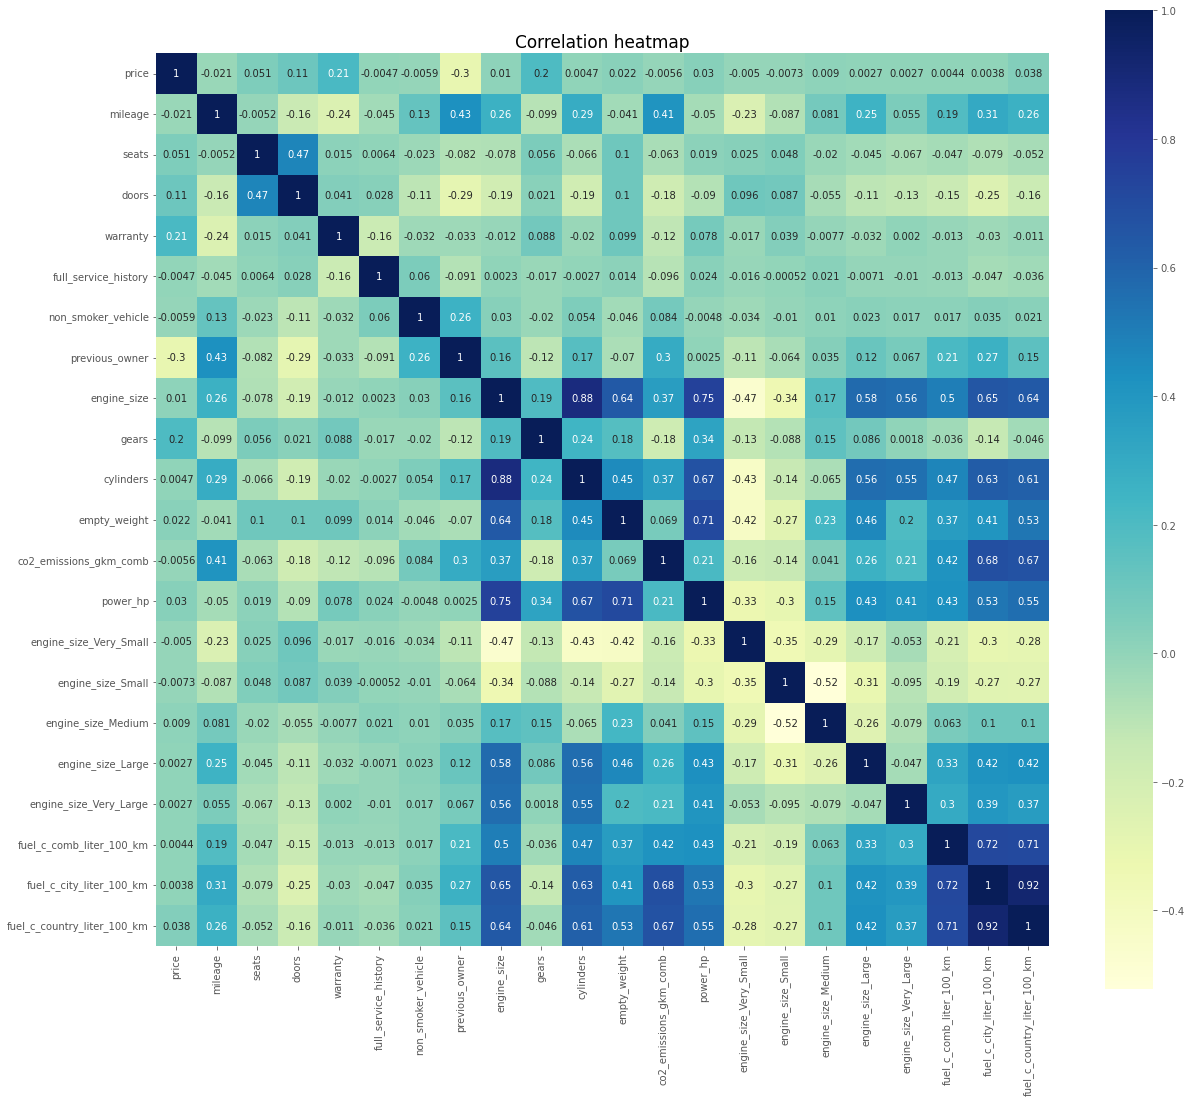

In [159]:
#herhangi bir düzenleme yapmadan corr baktik
heatMap(df)

In [160]:
import missingno as msno

<AxesSubplot:>

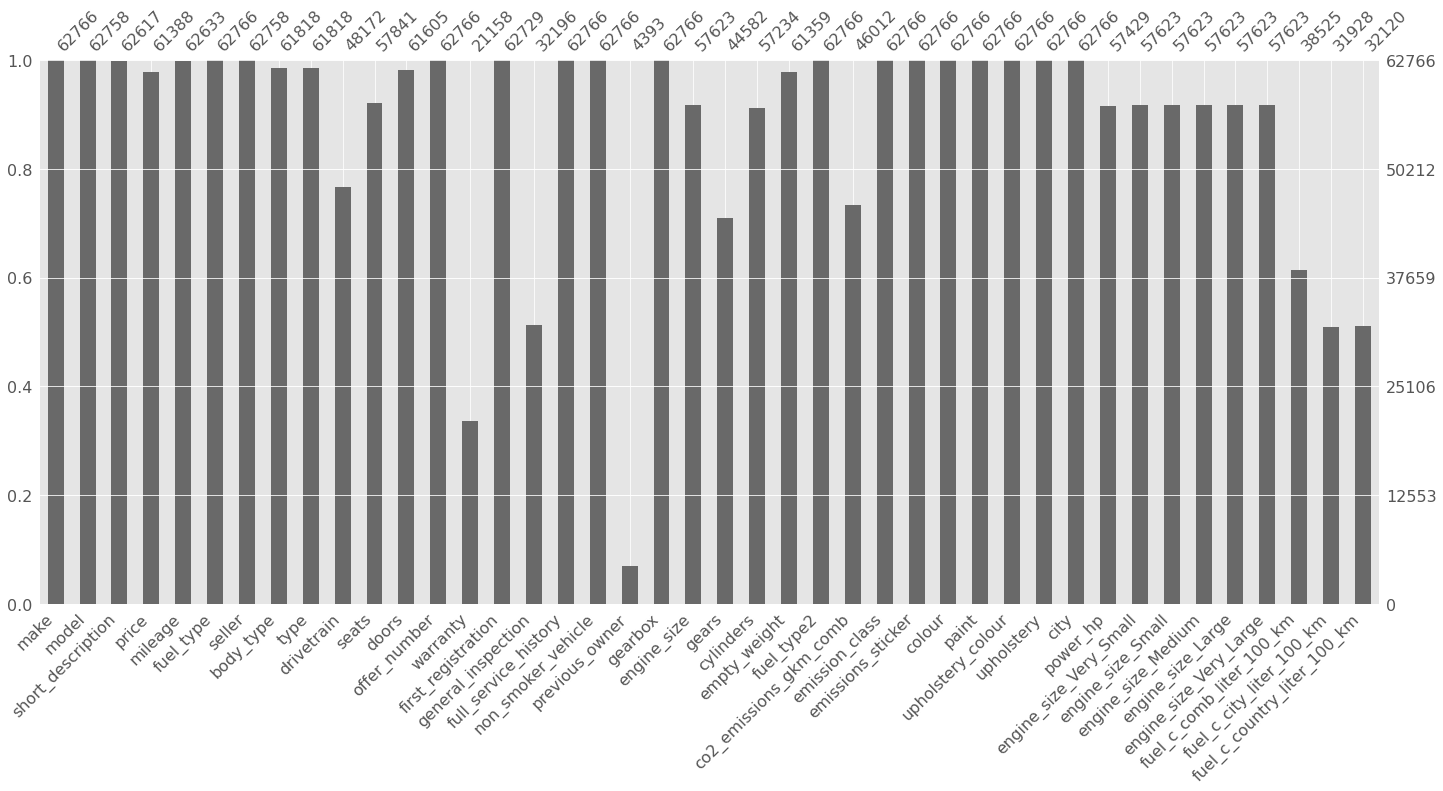

In [161]:
msno.bar(df)

<AxesSubplot:>

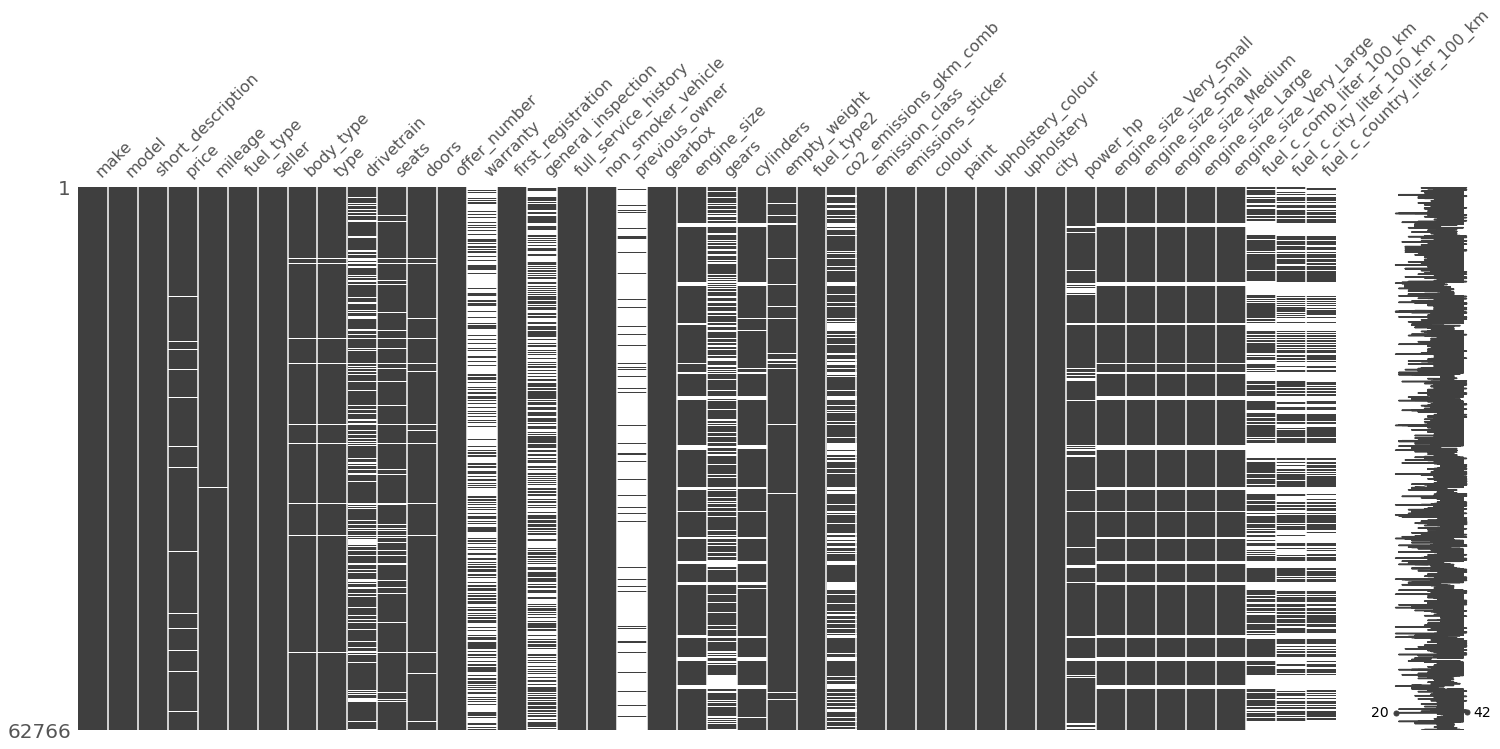

In [162]:
msno.matrix(df)

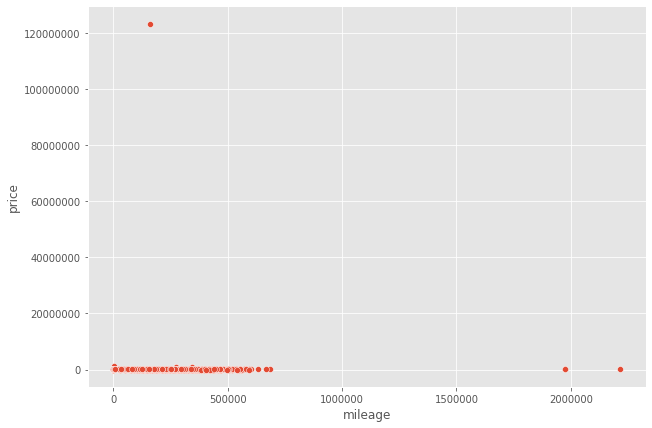

In [163]:
# önemli iki veriyi ayni grafikte karsilatirdik 
scattePlot(df["mileage"],df["price"])

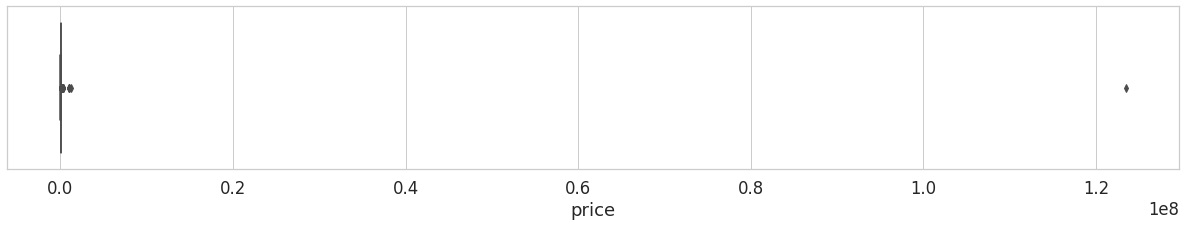

In [164]:
boxPlot(df["price"])

In [165]:
# outlier datalar icin fonksiyon tanimladik

def outlier(data):

    df_table = data
    Q1 = df_table.quantile(0.25)
    Q3 = df_table.quantile(0.75)
    IQR = Q3-Q1
    alt_sinir = Q1-1.5*IQR
    ust_sinir = Q3+1.5*IQR
    aykiri_tf = (df_table < alt_sinir) | (df_table > ust_sinir)
    index_aykiri_tf= df_table[aykiri_tf].index
    df_table = pd.DataFrame(df_table)
    df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir)))]
   
    return index_aykiri_tf 

In [166]:
out_price = outlier(df["price"])

In [167]:
#asiri degerlerin silinmesi
df.drop(df.index[[out_price]],axis=0,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


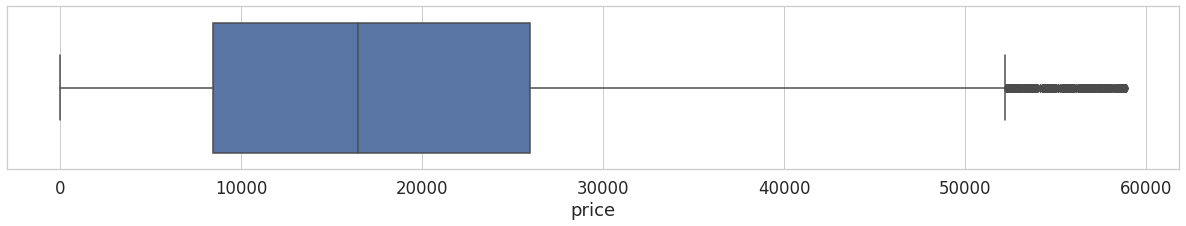

In [168]:
boxPlot(df["price"])

In [169]:
df.price.max()

58895.0

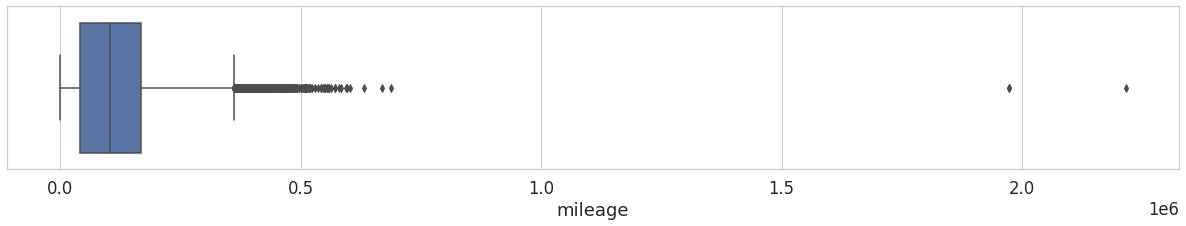

In [170]:
##asiri degerlerin bulunmasi mileage sutunu
boxPlot(df["mileage"])

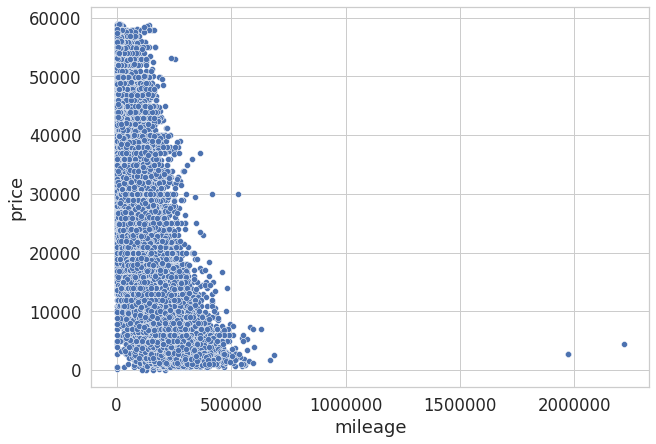

In [171]:
# price outlier degerlerinden sonra görünüm
scattePlot(df["mileage"],df["price"])

In [172]:
# silinen ögelerden dolayi indexi restlememiz gerekti
df.reset_index(drop=True, inplace=True)

In [173]:
out_mileage = outlier(df["mileage"])

In [174]:
#asiri degerlerin silinmesi
df.drop(df.index[[out_mileage]],axis=0,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


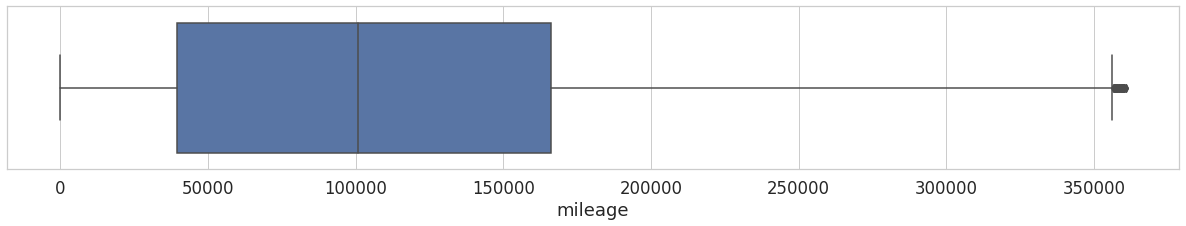

In [175]:
boxPlot(df["mileage"])

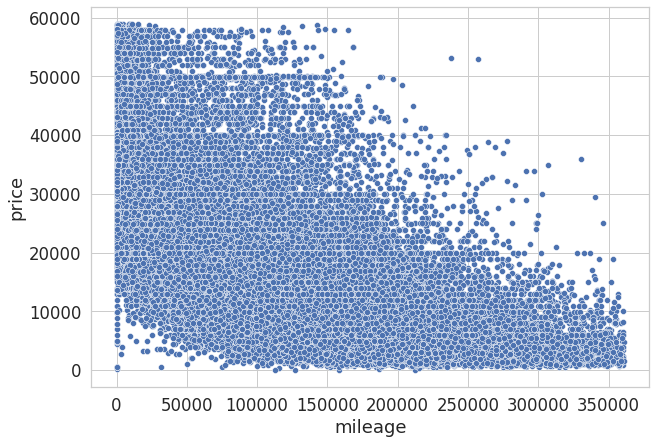

In [176]:
# mileage outlier degerlerinden sonra görünüm

scattePlot(df["mileage"],df["price"])

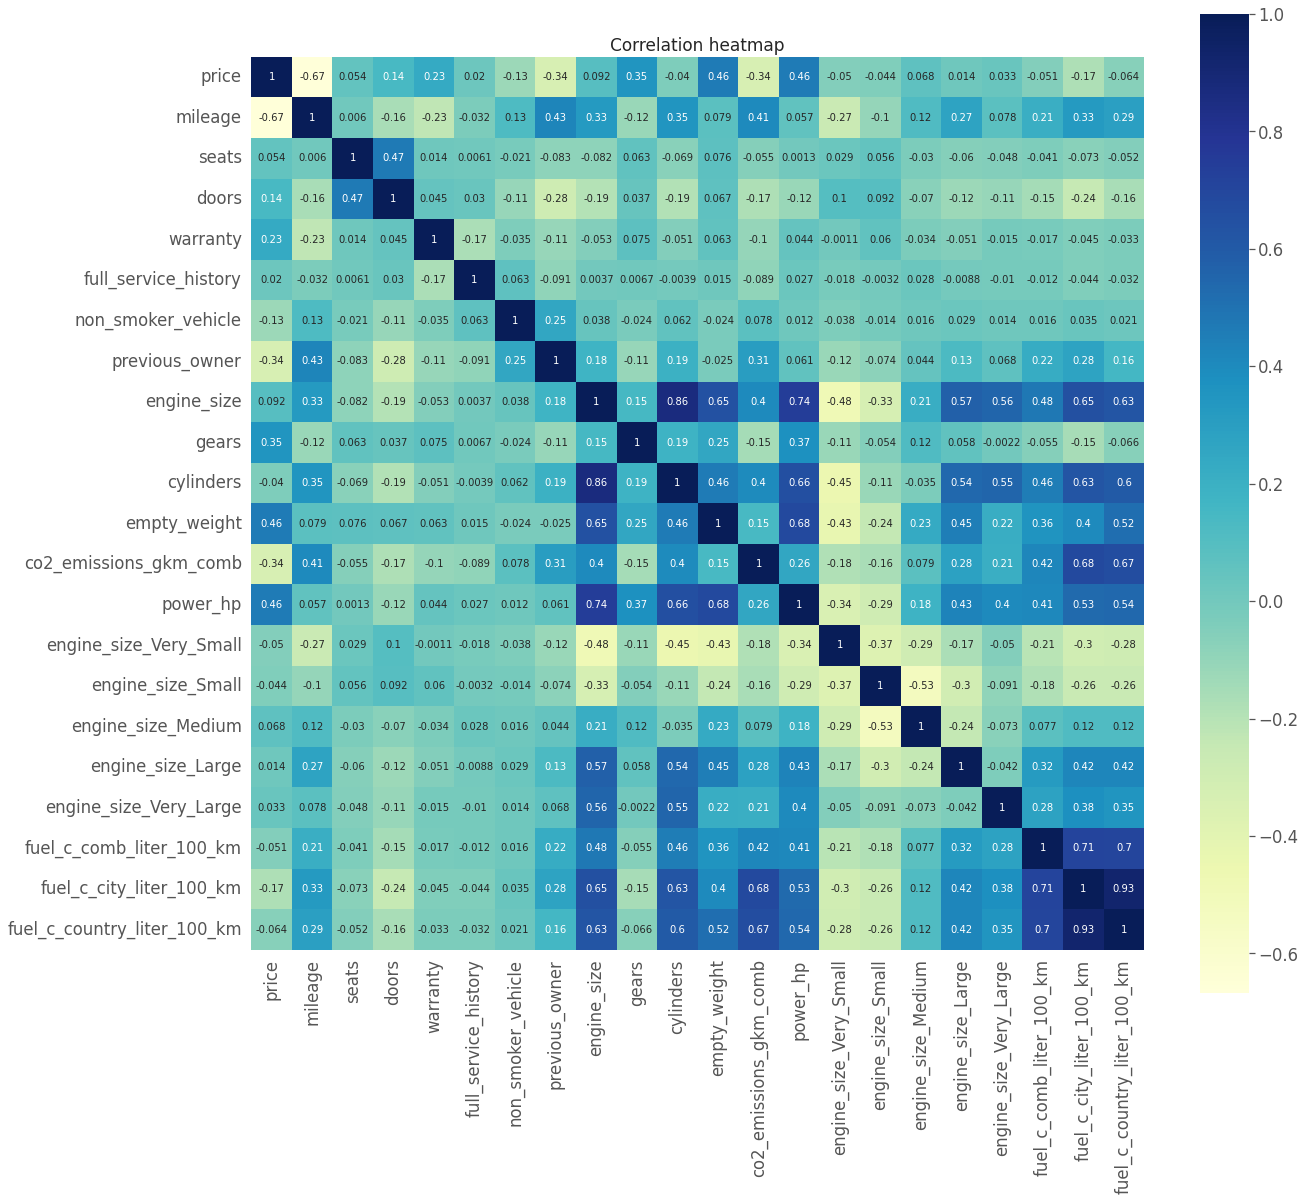

In [177]:
#  price ve mileage outlierindan temizledikten sonra heatmap görünümü
heatMap(df)

In [178]:
# silinen ögelerden dolayi indexi restlememiz gerekti
df.reset_index(drop=True, inplace=True)

In [179]:
# viteslerin fiyata ve diger bilesenlerle iliskisini görmek icin 1 0 metodu
gear=["Automatic","Manual","Semi-automatic"]

for i in gear:
    df[i] = np.where(df['gearbox'].str.contains(i), 1, 0)


In [180]:
df[["gearbox","Automatic","Manual","Semi-automatic"]]

,gearbox,Automatic,Manual,Semi-automatic
0,Automatic,1,0,0
1,Automatic,1,0,0
2,Automatic,1,0,0
3,Automatic,1,0,0
4,Automatic,1,0,0
...,...,...,...,...
58644,Automatic,1,0,0
58645,Automatic,1,0,0
58646,Manual,0,1,0
58647,Manual,0,1,0


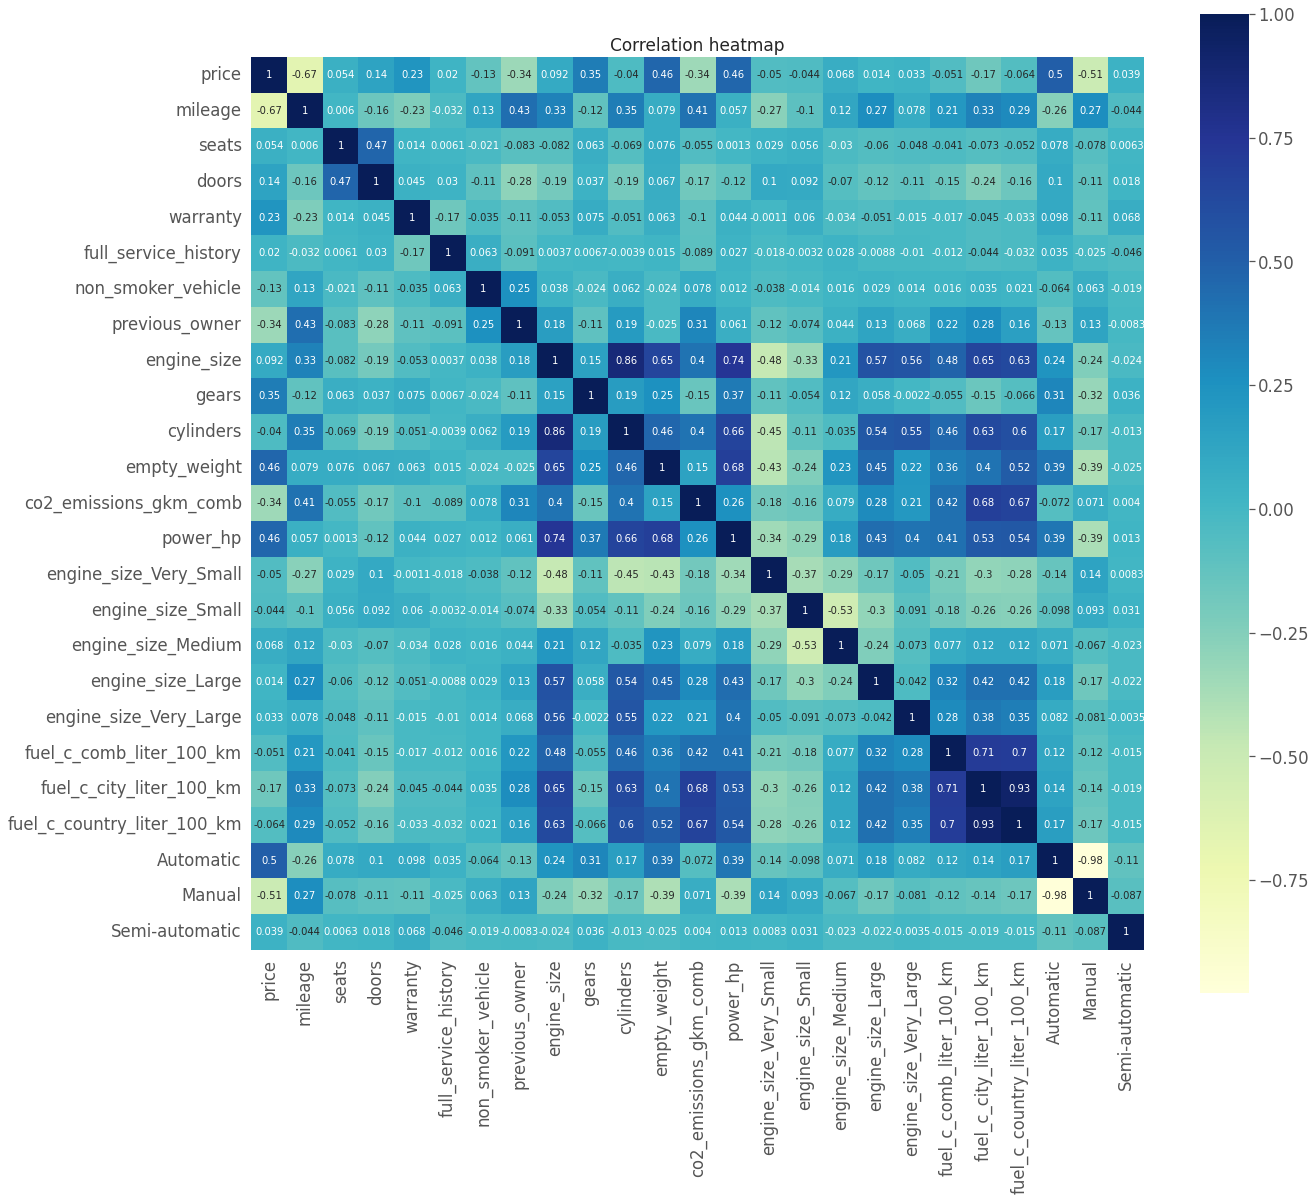

In [181]:
heatMap(df)

In [182]:
#pd.set_option('display.max_rows', None)

In [183]:
index = df['Automatic'].index[df['Automatic'].apply(np.isnan)]


In [184]:
pd.reset_option('^display.', silent=True)

In [185]:
# arac yasi ile koreleasyon kurmak icin regisfirst_registrationtration  sutununun numeric yapilmasi
df.first_registration

0        08/2003
1        10/2013
2        06/2015
3        10/2015
4        10/2017
          ...   
58644    11/2006
58645    03/2005
58646    06/2012
58647    12/2000
58648    08/2004
Name: first_registration, Length: 58649, dtype: object

In [186]:
df["first_registration"]=df["first_registration"].str.extract(r'(\d\d\d\d)',expand=False)
df['first_registration'] 

0        2003
1        2013
2        2015
3        2015
4        2017
         ... 
58644    2006
58645    2005
58646    2012
58647    2000
58648    2004
Name: first_registration, Length: 58649, dtype: object

In [187]:
df["first_registration"] = pd.to_numeric(df["first_registration"])

In [188]:
#pd.set_option('display.max_rows', None)

In [189]:
df["auto_old"]= [2022] - df['first_registration']
df.auto_old

0        19.0
1         9.0
2         7.0
3         7.0
4         5.0
         ... 
58644    16.0
58645    17.0
58646    10.0
58647    22.0
58648    18.0
Name: auto_old, Length: 58649, dtype: float64

In [190]:
pd.reset_option('^display.', silent=True)

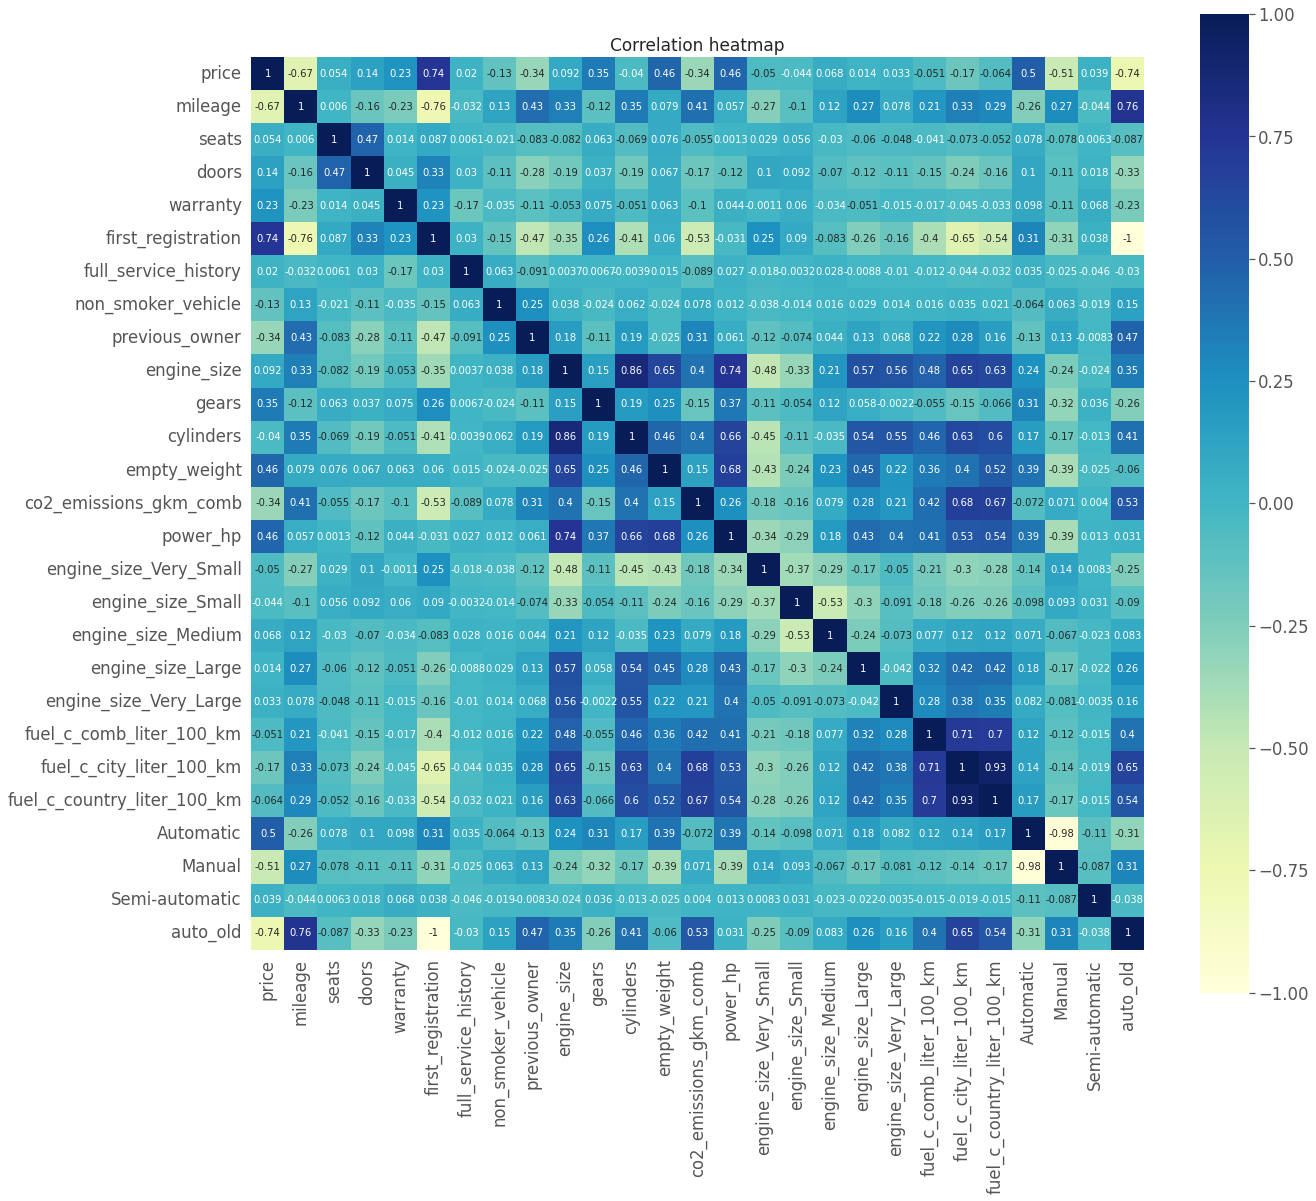

In [191]:
heatMap(df)

In [192]:
# km nan olanlarin doldurulmasi
df['mileage'].isnull().sum()

114

In [193]:
index = df['mileage'].index[df['mileage'].apply(np.isnan)]
#index=list(index)
index

Int64Index([ 9819, 10745, 11255, 13416, 13767, 13775, 13777, 13782, 13860,
            13864,
            ...
            48562, 48689, 48691, 48702, 48704, 51147, 51148, 56438, 58167,
            58189],
           dtype='int64', length=114)

In [194]:
df[["mileage","first_registration","type"]].loc[index]

,mileage,first_registration,type
9819,NaN,2021.0,New
10745,NaN,2022.0,New
11255,NaN,2021.0,New
13416,NaN,2021.0,New
13767,NaN,2021.0,New
...,...,...,...
51147,NaN,2022.0,New
51148,NaN,2022.0,New
56438,NaN,2021.0,New
58167,NaN,2022.0,New


In [195]:
# arabalarin tarihlerinden yeni olduklarini gördük 0 ile doldurduk
df['mileage'] = df['mileage'].fillna(0)

In [196]:
# fiyat nan larinin doldurulmasi
index = df['price'].index[df['price'].apply(np.isnan)]
#index=list(index)
index.T

Int64Index([   72,    79,    84,    93,    98,   148,   302,   316,   402,
              451,
            ...
            58232, 58329, 58346, 58347, 58366, 58411, 58420, 58457, 58488,
            58565],
           dtype='int64', length=1372)

In [197]:
df[["mileage", "first_registration", "price", "make", "model"]].loc[index]

,mileage,first_registration,price,make,model
72,74896.0,2015.0,NaN,Audi,A3
79,89378.0,2013.0,NaN,Audi,A1
84,150796.0,2010.0,NaN,Audi,A5
93,135023.0,2011.0,NaN,Audi,A1
98,147826.0,2012.0,NaN,Audi,A1
...,...,...,...,...,...
58411,17239.0,2021.0,NaN,Volvo,V60CrossCountry
58420,19734.0,2020.0,NaN,Volvo,V90
58457,19500.0,2021.0,NaN,Volvo,S60
58488,5823.0,2020.0,NaN,Volvo,XC60


In [198]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.reset_option("^display")

In [199]:
df_mean = df.groupby(["make","model","first_registration"])[['price']].mean()
df_mean["price"]

make   model  first_registration
Audi   A1     2010.0                 8880.045455
              2011.0                 9356.473684
              2012.0                10982.571429
              2013.0                10889.384615
              2014.0                12892.260870
                                        ...     
Volvo  XC90   2014.0                25925.000000
              2015.0                40860.800000
              2016.0                41951.207317
              2017.0                42368.833333
              2018.0                50209.750000
Name: price, Length: 5255, dtype: float64

In [200]:
df_mean["price"]["Audi"]["A3"][2015]

19452.768656716416

In [201]:
# nan degerleri ayni marka ayni model arabalarin ortalamari ile dolduruldu

df["price"] = df.groupby(["make","model","first_registration"])[['price']].transform(lambda x: x.fillna(x.mean()))

In [202]:
df[["mileage","first_registration", "price","make","model"]].loc[index]

,mileage,first_registration,price,make,model
72,74896.0,2015.0,19452.768657,Audi,A3
79,89378.0,2013.0,10889.384615,Audi,A1
84,150796.0,2010.0,14586.818182,Audi,A5
93,135023.0,2011.0,9356.473684,Audi,A1
98,147826.0,2012.0,10982.571429,Audi,A1
...,...,...,...,...,...
58411,17239.0,2021.0,54455.625000,Volvo,V60CrossCountry
58420,19734.0,2020.0,54219.933333,Volvo,V90
58457,19500.0,2021.0,46904.375000,Volvo,S60
58488,5823.0,2020.0,51246.187500,Volvo,XC60


In [203]:
df.isnull().sum()

make                               0
model                              6
short_description                147
price                             97
mileage                            0
fuel_type                          0
seller                             6
body_type                        926
type                             926
drivetrain                     14047
seats                           4696
doors                           1122
offer_number                       0
warranty                       38907
first_registration                21
general_inspection             27946
full_service_history               0
non_smoker_vehicle                 0
previous_owner                 54493
gearbox                            0
engine_size                     3638
gears                          16524
cylinders                       4152
empty_weight                    1234
fuel_type2                         0
co2_emissions_gkm_comb         14594
emission_class                     0
e

In [204]:
index = df['auto_old'].index[df['auto_old'].apply(np.isnan)]
#index=list(index)
index.T
df[["mileage","first_registration", "short_description","auto_old","make","model"]].loc[index]


,mileage,first_registration,short_description,auto_old,make,model
27192,5.0,NaN,Pro 77 kWh 204pk LED matrix IQ light 20 Dramm,NaN,Volkswagen,ID4
31515,10.0,NaN,Z.E. R80 Collection Tijdelijk nog Voorraad Voo...,NaN,Renault,Twingo
31716,10.0,NaN,Z.E. R80 Intens TIJDELIJK NOG MET 2.500 VOORRA,NaN,Renault,Twingo
32156,1.0,NaN,Estate 1.6 Plug In Hybrid Intens 160,NaN,Renault,Megane
32579,10.0,NaN,1.2 PureTech S S Shine,NaN,Citroen,C3
34393,1.0,NaN,SUV HYBRID 225 ë EAT8 Selection,NaN,Citroen,C5Aircross
40453,1.0,NaN,1.6 T GDI Hybrid 230pk 2WD N Line Suede leder,NaN,Hyundai,Tucson
40462,1.0,NaN,PHEV 1.6 T GDI Plugin Hybrid 265pk 4WD N Line Sky,NaN,Hyundai,Tucson
40469,1.0,NaN,PHEV 1.6 T GDI Plugin Hybrid 265pk 4WD Premium...,NaN,Hyundai,Tucson
48456,501.0,NaN,e 208 EV 50 kWh Active met navigatie Gereducee,NaN,Peugeot,208


Text(0, 0.5, 'Number of cars on sale')

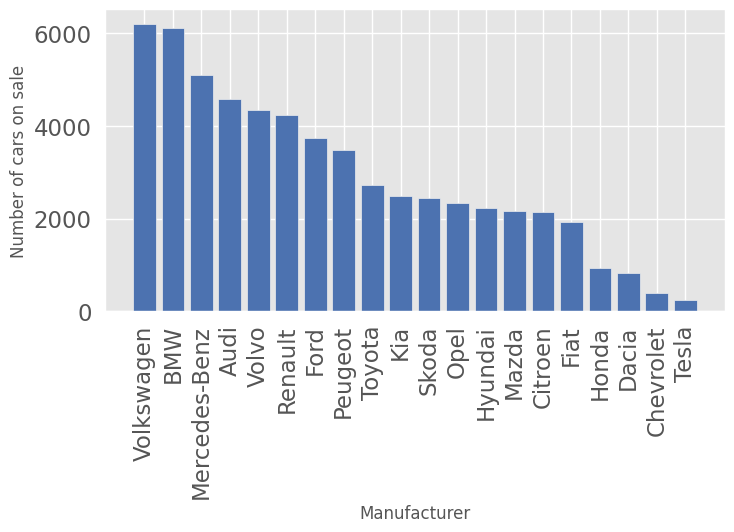

In [205]:
# en cok ilanda olan araclarin grafigi
manufacturers_counts = df['make'].value_counts().to_dict()
fig = plt.figure(figsize=(8, 4), dpi= 100, facecolor='w', edgecolor='w')
plt.bar(manufacturers_counts.keys(),manufacturers_counts.values(),color='b')
plt.xticks(rotation = 90);
plt.xlabel('Manufacturer');
plt.ylabel('Number of cars on sale')



Text(0.5, 1.0, 'Fuel Type')

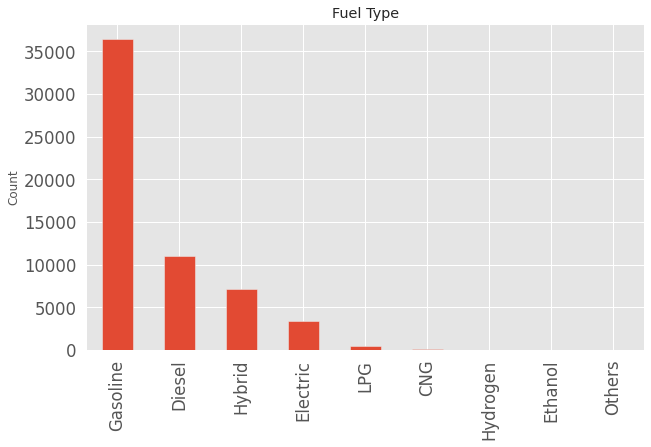

In [206]:
#check the number of Fuel Type of the listed used cars 
plt.subplots(figsize=(10,6))
df.fuel_type.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Fuel Type')


In [207]:
df.head(2)

,make,model,short_description,price,mileage,fuel_type,seller,body_type,type,drivetrain,...,engine_size_Medium,engine_size_Large,engine_size_Very_Large,fuel_c_comb_liter_100_km,fuel_c_city_liter_100_km,fuel_c_country_liter_100_km,Automatic,Manual,Semi-automatic,auto_old
0,Audi,A3,2.0 FSI Ambition Pro Line,4450.0,191066.0,Gasoline,Dealer,Compact,Used,Front,...,1.0,0.0,0.0,NaN,NaN,NaN,1,0,0,19.0
1,Audi,A3,Sportback 1.4 TFSI Ambiente ECC PDC Lichtmeta...,12950.0,94758.0,Gasoline,Dealer,Compact,Used,Front,...,0.0,0.0,0.0,4.9,NaN,NaN,1,0,0,9.0


In [208]:
# df["fuel_c_comb_liter_100_km"] = df.groupby(["make","model","registration",'engine_size_cc'])[['fuel_c_comb_liter_100_km']].transform(lambda x: x.fillna(x.mean()))

In [209]:
listem = ['fuel_c_comb_liter_100_km', 'fuel_c_city_liter_100_km', 'fuel_c_country_liter_100_km', 'power_hp', 'cylinders']

In [210]:
df[listem].isnull().sum()

fuel_c_comb_liter_100_km       21118
fuel_c_city_liter_100_km       27363
fuel_c_country_liter_100_km    27193
power_hp                        3984
cylinders                       4152
dtype: int64

In [211]:
for i in listem:
    df[i] = df.groupby(["make","model","first_registration",'engine_size'])[[i]].transform(lambda x: x.fillna(x.mean()))

In [212]:
df[listem].isnull().sum()

fuel_c_comb_liter_100_km        9906
fuel_c_city_liter_100_km       12025
fuel_c_country_liter_100_km    12017
power_hp                        3853
cylinders                       3905
dtype: int64

In [213]:
df.head(2)

,make,model,short_description,price,mileage,fuel_type,seller,body_type,type,drivetrain,...,engine_size_Medium,engine_size_Large,engine_size_Very_Large,fuel_c_comb_liter_100_km,fuel_c_city_liter_100_km,fuel_c_country_liter_100_km,Automatic,Manual,Semi-automatic,auto_old
0,Audi,A3,2.0 FSI Ambition Pro Line,4450.0,191066.0,Gasoline,Dealer,Compact,Used,Front,...,1.0,0.0,0.0,7.2,9.900000,5.600000,1,0,0,19.0
1,Audi,A3,Sportback 1.4 TFSI Ambiente ECC PDC Lichtmeta...,12950.0,94758.0,Gasoline,Dealer,Compact,Used,Front,...,0.0,0.0,0.0,4.9,6.173913,4.286957,1,0,0,9.0


In [214]:
pd.reset_option("^display")

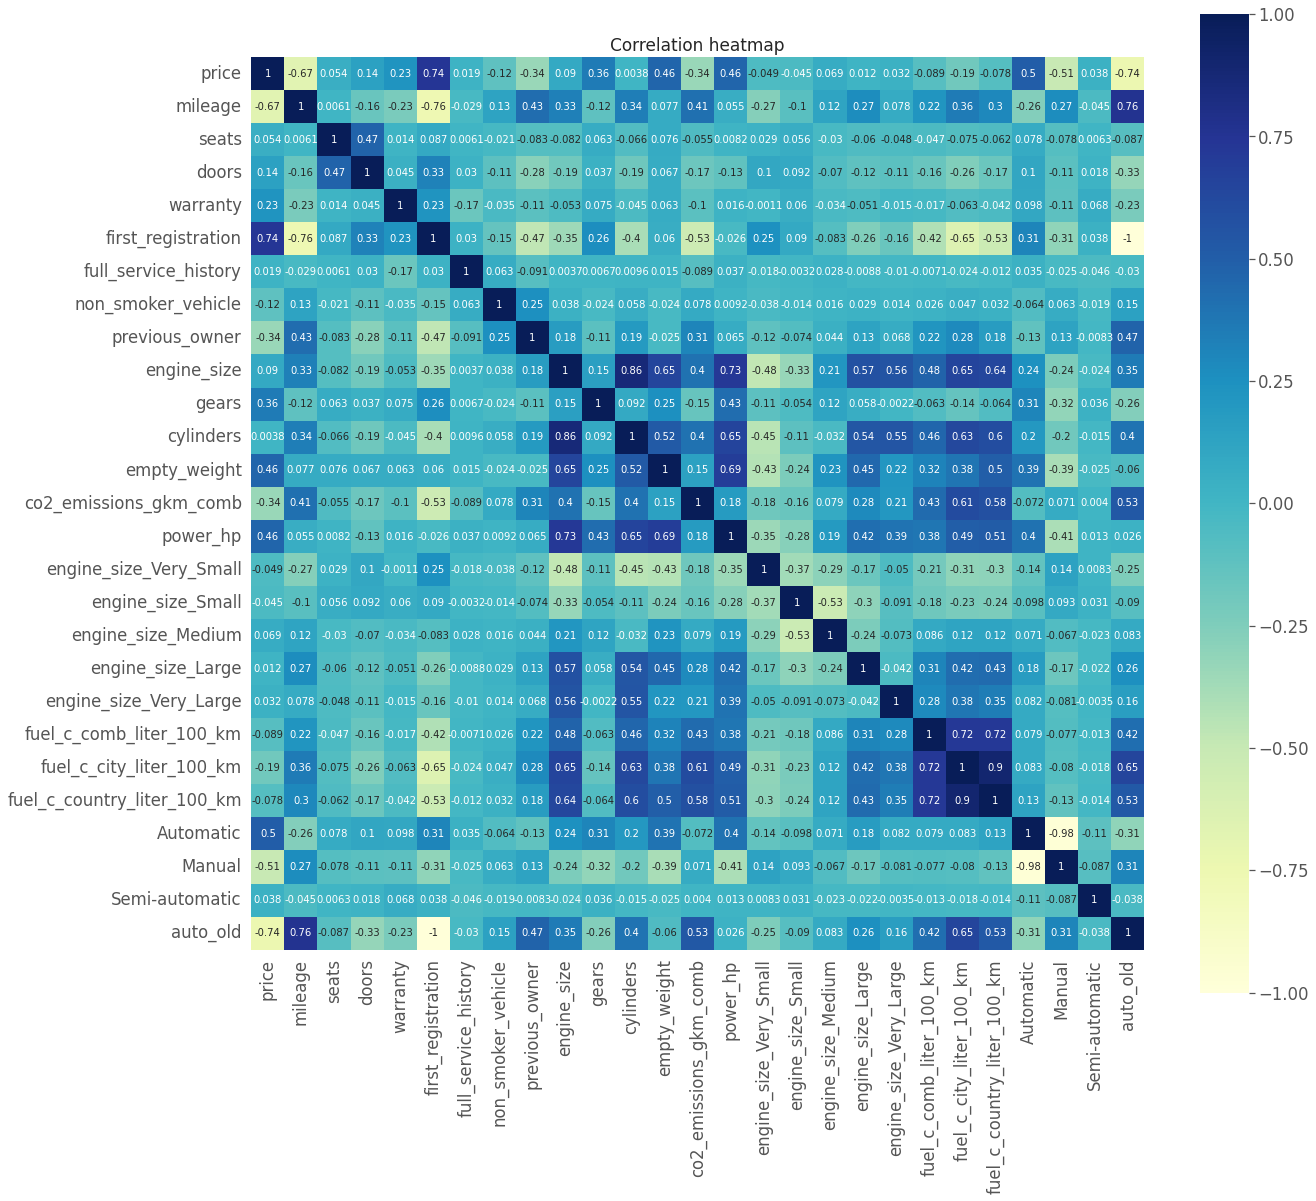

In [215]:
heatMap(df)

In [216]:
def corrFilter(x: pd.DataFrame, bound: 0.5):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened
corrFilter(df, 0).sort_values()

first_registration           auto_old                   -1.000000
Automatic                    Manual                     -0.977049
first_registration           mileage                    -0.762314
price                        auto_old                   -0.740453
                             mileage                    -0.666013
                                                           ...   
                             first_registration          0.740453
auto_old                     mileage                     0.762314
cylinders                    engine_size                 0.864233
fuel_c_country_liter_100_km  fuel_c_city_liter_100_km    0.901120
price                        price                            NaN
Length: 352, dtype: float64

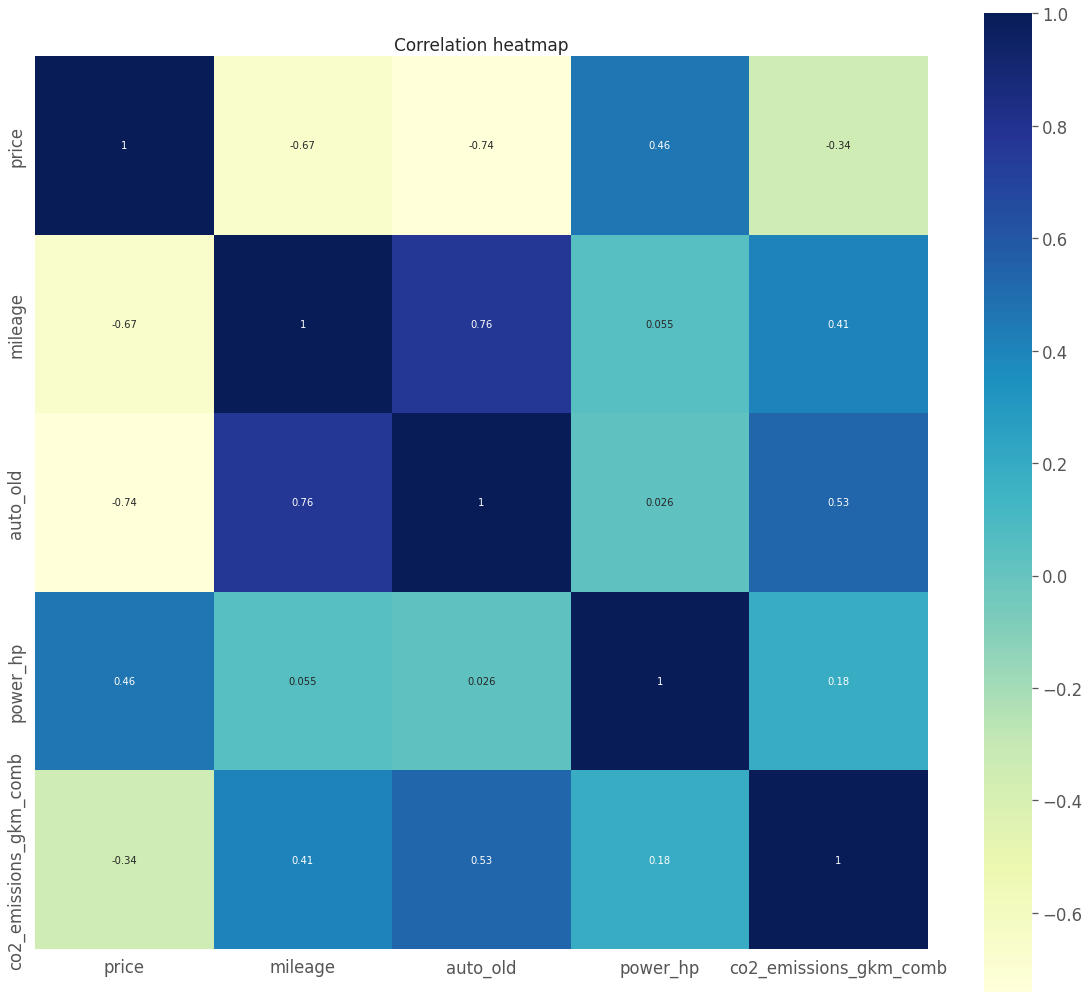

In [217]:
df_heat=df[["price","mileage","auto_old","power_hp","co2_emissions_gkm_comb"]]
heatMap(df_heat)